In [36]:
 #Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import re
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [37]:
#Loading the dataset
df=pd.read_csv('Composite.csv', encoding= 'unicode_escape')
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 922


No.  Type_of_fiber  Fiber_diameter  Embedded_length  \
0    1            1.0             6.0             42.5   
1    2            1.0             6.0             42.5   
2    3            1.0             6.0             42.5   
3    4            1.0             6.0             42.5   
4    5            1.0             6.0             42.5   

   YoungÕs_modulus_of_fiber  PoissonÕs_ratio_of_fiber  Type_of_matrix  \
0                     294.0                       0.3               1   
1                     294.0                       0.3               1   
2                     294.0                       0.3               1   
3                     294.0                       0.3               1   
4                     294.0                       0.3               1   

   YoungÕs_modulus_of_matrix  PoissonÕs_ratio_of_matrix  Loading_rate  \
0                        3.0                       0.34           6.0   
1                        3.0                       0.34           6.0   
2                        2.5                       0.34           6.0   
3                        2.3                       0.34           6.0   
4                        2.3                       0.34           6.0   

   Prepare_temperature  Test_temperature   Fmax  IFSS  
0                  370              30.0  0.054  67.1  
1                  370              30.0  0.049  60.8  
2                  370              50.0  0.055  68.6  
3                  370              70.0  0.058  71.8  
4                  370              70.0  0.048  60.2

In [38]:
# df['New_Fiber_diameter']=1/np.log(df['Fiber_diameter'])

In [39]:
#Information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No.                        922 non-null    int64  
 1   Type_of_fiber              918 non-null    float64
 2   Fiber_diameter             922 non-null    float64
 3   Embedded_length            922 non-null    float64
 4   YoungÕs_modulus_of_fiber   922 non-null    float64
 5   PoissonÕs_ratio_of_fiber   922 non-null    float64
 6   Type_of_matrix             922 non-null    int64  
 7   YoungÕs_modulus_of_matrix  922 non-null    float64
 8   PoissonÕs_ratio_of_matrix  922 non-null    float64
 9   Loading_rate               922 non-null    float64
 10  Prepare_temperature        922 non-null    int64  
 11  Test_temperature           922 non-null    float64
 12  Fmax                       922 non-null    float64
 13  IFSS                       922 non-null    float64

In [40]:
df.isnull().sum()

No.                          0
Type_of_fiber                4
Fiber_diameter               0
Embedded_length              0
YoungÕs_modulus_of_fiber     0
PoissonÕs_ratio_of_fiber     0
Type_of_matrix               0
YoungÕs_modulus_of_matrix    0
PoissonÕs_ratio_of_matrix    0
Loading_rate                 0
Prepare_temperature          0
Test_temperature             0
Fmax                         0
IFSS                         0
dtype: int64

In [41]:
df=df.dropna()

In [42]:
print(df.shape)

(918, 14)


In [43]:
# let's explore the content of these year variables
for feature in df:
    print(feature, df[feature].unique())

No. [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 24

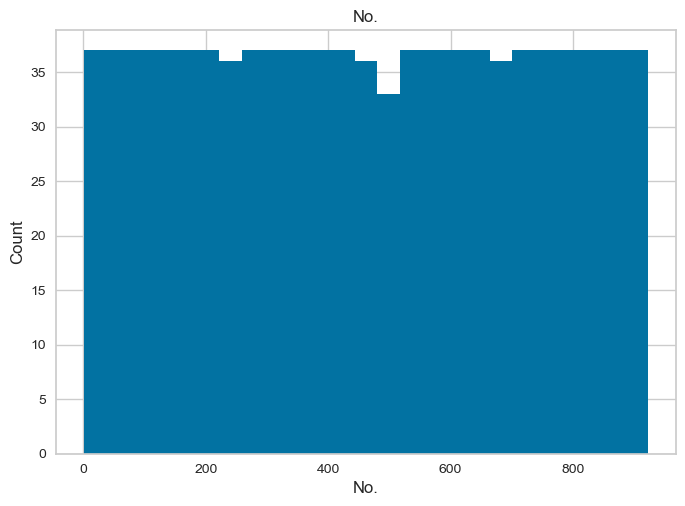

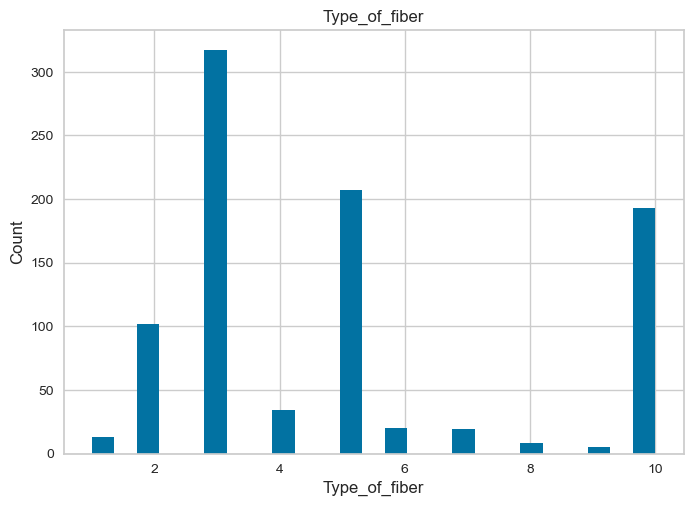

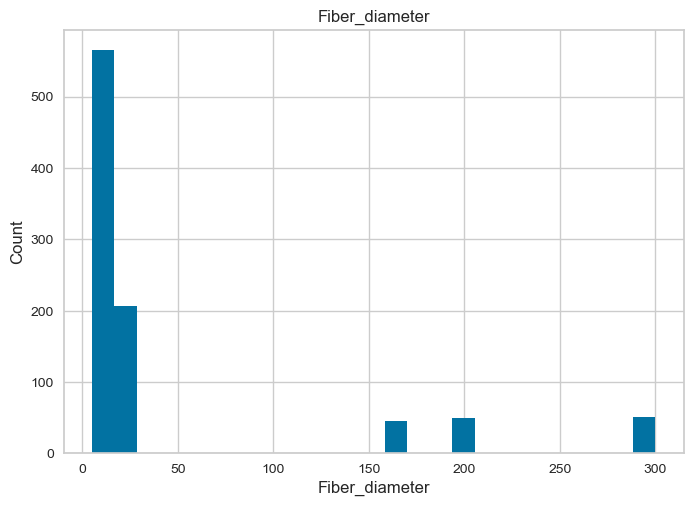

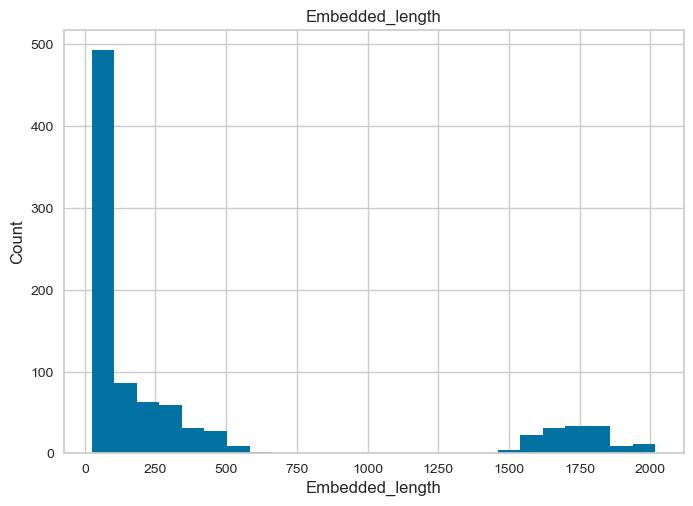

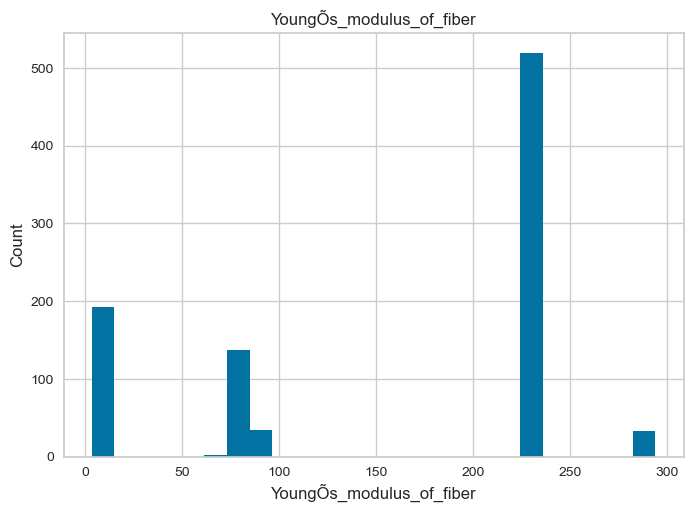

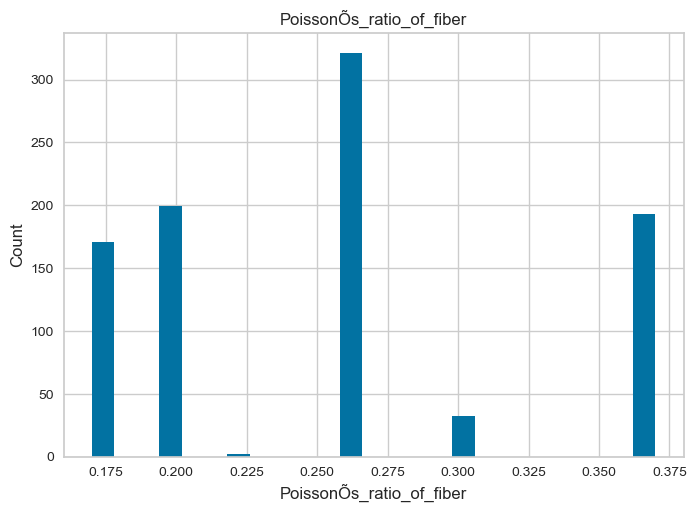

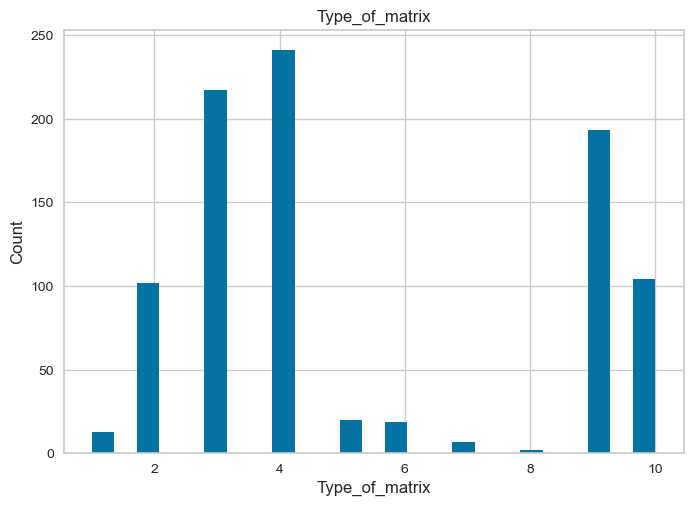

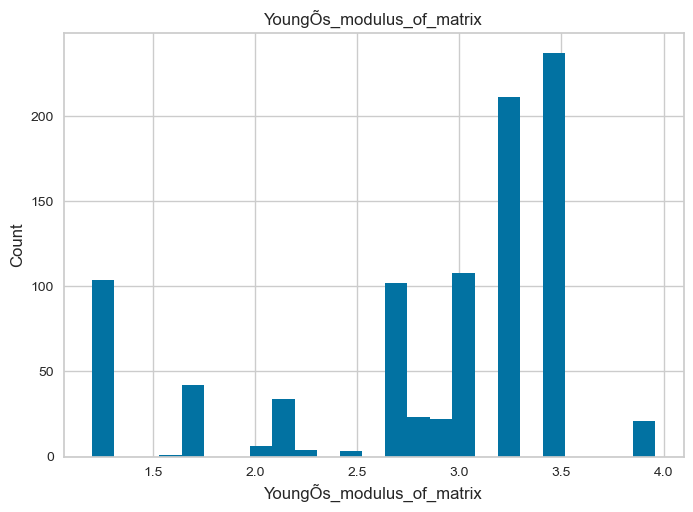

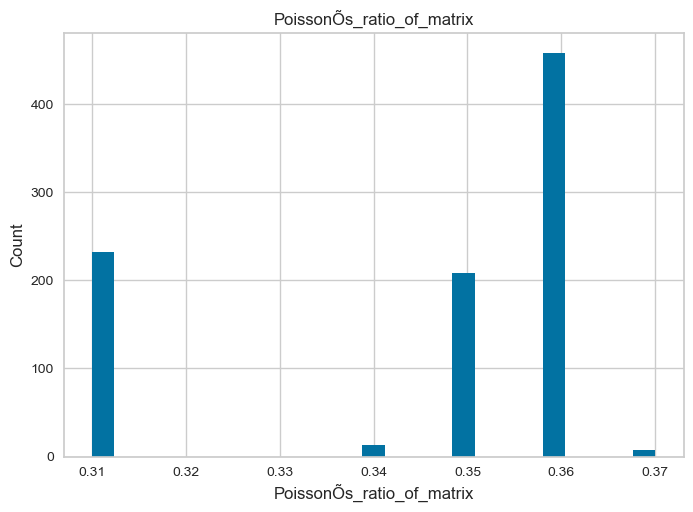

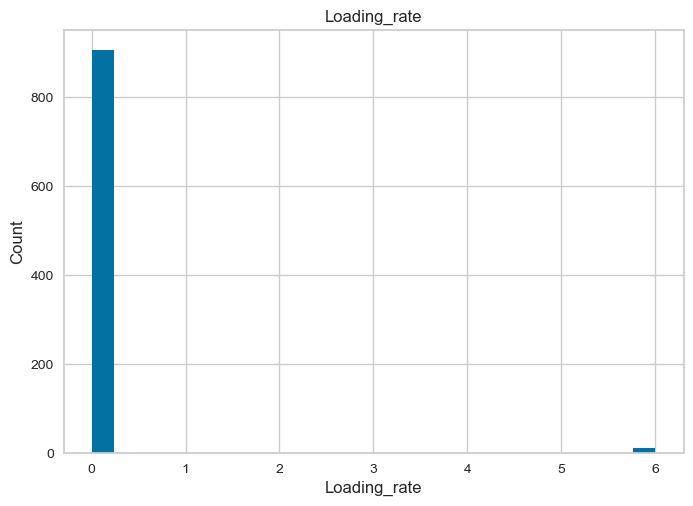

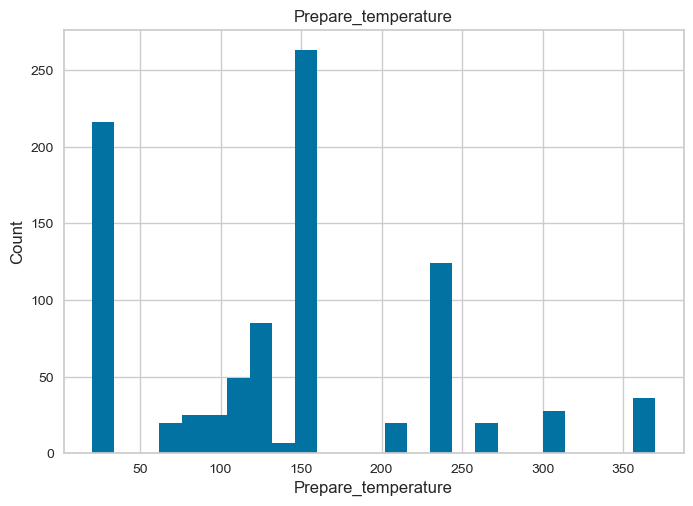

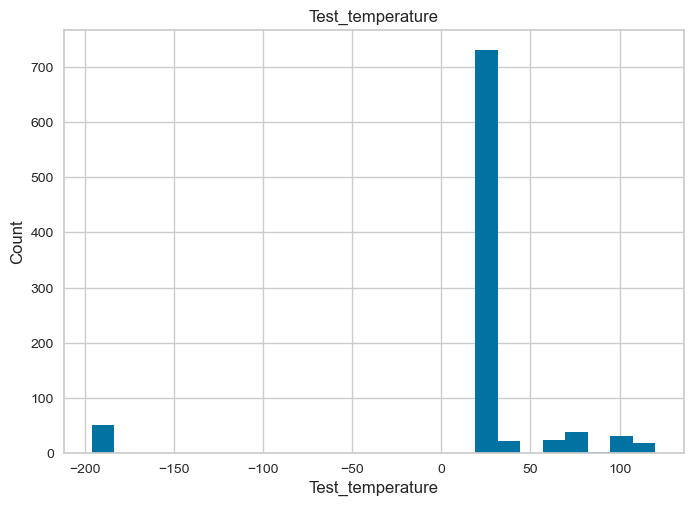

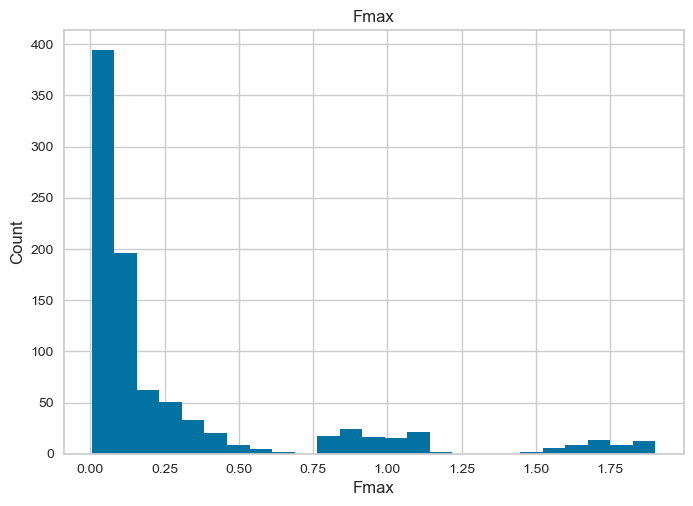

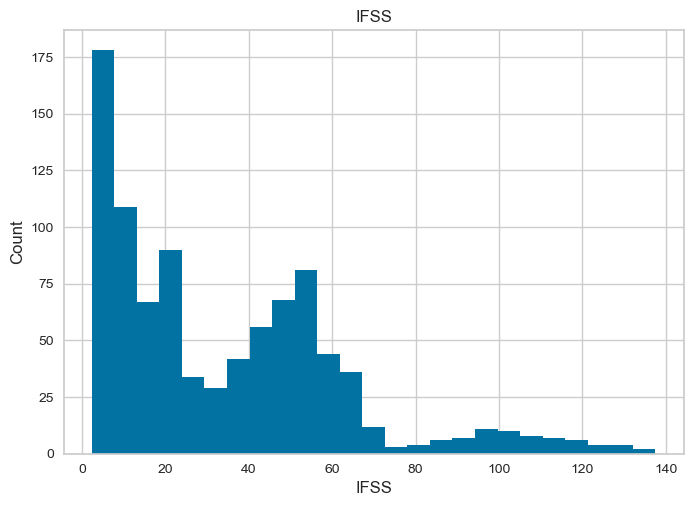

In [44]:
#Checking distributions of each features.
#Distribution of Genotype and Treatment_Behaviour shows data is balanced
for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [45]:
df1=df.drop(['No.'],axis=1)

In [46]:
df1.head()

Type_of_fiber  Fiber_diameter  Embedded_length  YoungÕs_modulus_of_fiber  \
0            1.0             6.0             42.5                     294.0   
1            1.0             6.0             42.5                     294.0   
2            1.0             6.0             42.5                     294.0   
3            1.0             6.0             42.5                     294.0   
4            1.0             6.0             42.5                     294.0   

   PoissonÕs_ratio_of_fiber  Type_of_matrix  YoungÕs_modulus_of_matrix  \
0                       0.3               1                        3.0   
1                       0.3               1                        3.0   
2                       0.3               1                        2.5   
3                       0.3               1                        2.3   
4                       0.3               1                        2.3   

   PoissonÕs_ratio_of_matrix  Loading_rate  Prepare_temperature  \
0                       0.34           6.0                  370   
1                       0.34           6.0                  370   
2                       0.34           6.0                  370   
3                       0.34           6.0                  370   
4                       0.34           6.0                  370   

   Test_temperature   Fmax  IFSS  
0              30.0  0.054  67.1  
1              30.0  0.049  60.8  
2              50.0  0.055  68.6  
3              70.0  0.058  71.8  
4              70.0  0.048  60.2

<Axes: >

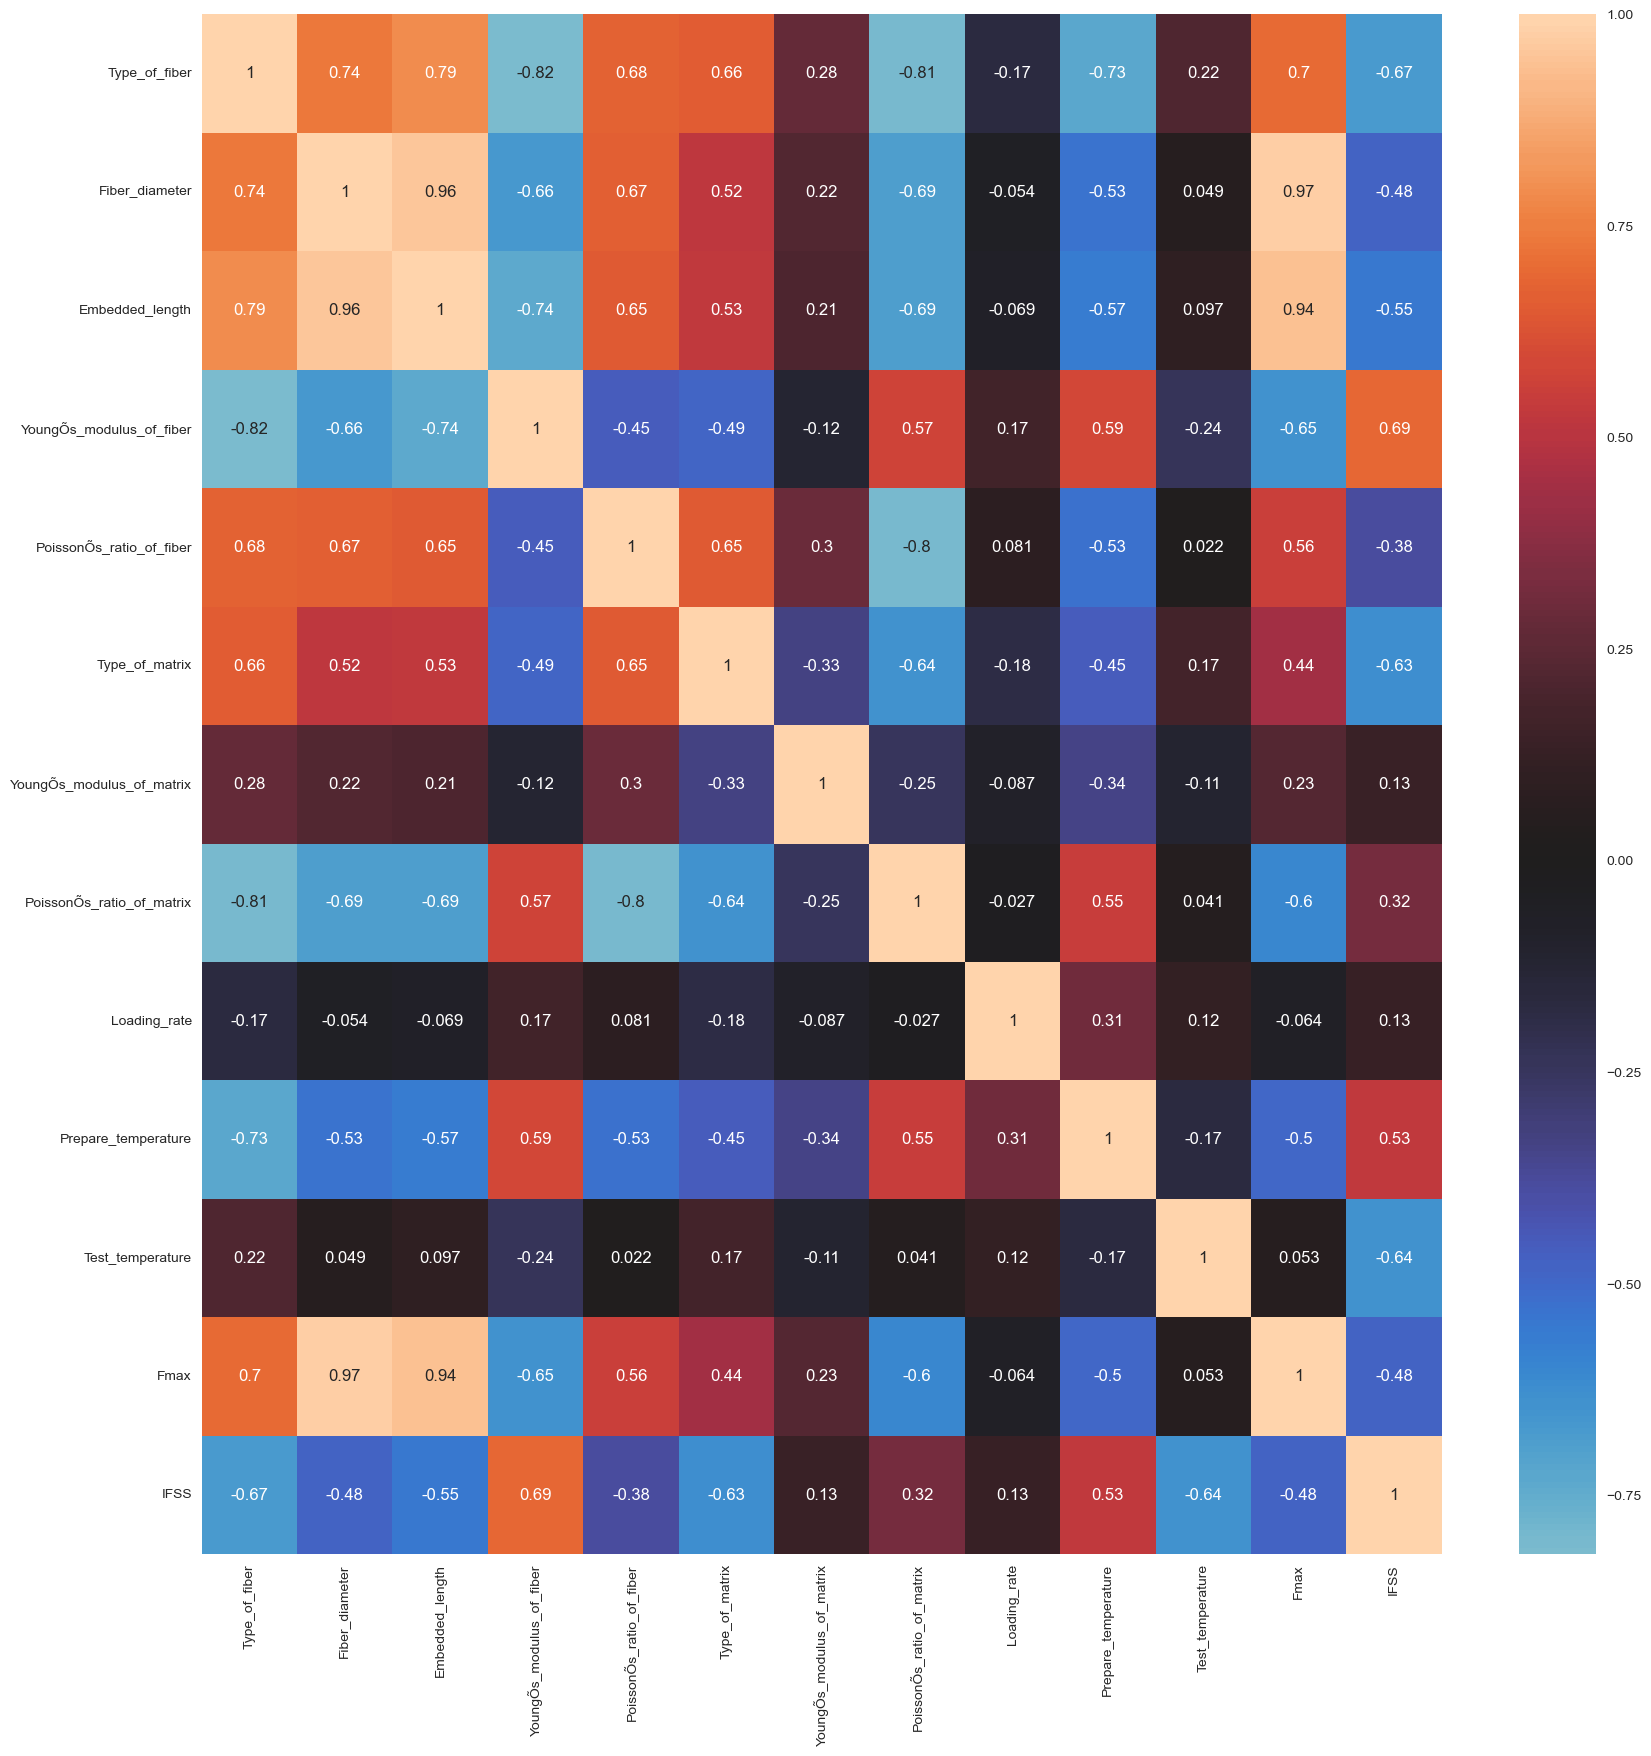

In [47]:
#correlation matrix
corrmat= df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, center=0)

In [48]:
def corr(x, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = x.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [49]:
#Getting features wigh correlation more than 85%
corr_features = corr(df, 0.70)
len(set(corr_features))
corr_features

{'Embedded_length',
 'Fiber_diameter',
 'Fmax',
 'PoissonÕs_ratio_of_matrix',
 'Prepare_temperature',
 'YoungÕs_modulus_of_fiber'}

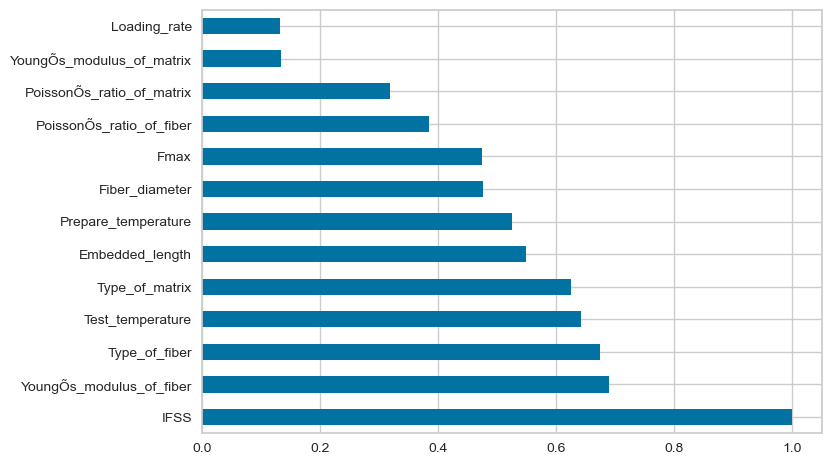

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the correlation matrix using Pearson correlation coefficient
corr_matrix = df1.corr(method='pearson')

# Sort the correlations in descending order
corr_ranking = corr_matrix['IFSS']
corr_ranking = abs(corr_ranking).sort_values(ascending=False)
# # Create a horizontal bar plot of the correlation-based ranking
# fig, ax = plt.subplots(figsize=(10,8))
# ax.barh(corr_ranking.index, corr_ranking.values)
# ax.set_title('Correlation-based ranking')
# ax.set_xlabel('Correlation coefficient')
# ax.set_ylabel('Features')
# plt.show()

feat_importances = pd.Series(abs(corr_ranking), index=df1.columns)
feat_importances.nlargest(26).plot(kind='barh')
plt.show()

In [51]:
df.columns

Index(['No.', 'Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature', 'Fmax', 'IFSS'],
      dtype='object')

In [56]:
df1=df.drop(['No.'],axis=1)

In [57]:
df_pca=df.drop(['No.', 'Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature'],axis=1)
df_pca

Fmax  IFSS
0    0.054  67.1
1    0.049  60.8
2    0.055  68.6
3    0.058  71.8
4    0.048  60.2
..     ...   ...
917  0.193  35.6
918  0.218  34.4
919  0.238  32.9
920  0.255  31.4
921  0.271  30.0

[918 rows x 2 columns]

In [58]:
scaler = StandardScaler()
scaler.fit(df1)
scaled_ds = pd.DataFrame(scaler.transform(df1),columns= df1.columns )
print("All features are now scaled")

All features are now scaled


In [59]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Type_of_fiber  Fiber_diameter  Embedded_length  YoungÕs_modulus_of_fiber  \
0      -1.415132       -0.465988         -0.58598                  1.391371   
1      -1.415132       -0.465988         -0.58598                  1.391371   
2      -1.415132       -0.465988         -0.58598                  1.391371   
3      -1.415132       -0.465988         -0.58598                  1.391371   
4      -1.415132       -0.465988         -0.58598                  1.391371   

   PoissonÕs_ratio_of_fiber  Type_of_matrix  YoungÕs_modulus_of_matrix  \
0                  0.650081       -1.475013                   0.165694   
1                  0.650081       -1.475013                   0.165694   
2                  0.650081       -1.475013                  -0.496102   
3                  0.650081       -1.475013                  -0.760821   
4                  0.650081       -1.475013                  -0.760821   

   PoissonÕs_ratio_of_matrix  Loading_rate  Prepare_temperature  \
0                  -0.235155      8.342985             2.587999   
1                  -0.235155      8.342985             2.587999   
2                  -0.235155      8.342985             2.587999   
3                  -0.235155      8.342985             2.587999   
4                  -0.235155      8.342985             2.587999   

   Test_temperature      Fmax      IFSS  
0          0.160868 -0.544295  1.152307  
1          0.160868 -0.555527  0.932261  
2          0.512631 -0.542049  1.204699  
3          0.864393 -0.535310  1.316468  
4          0.864393 -0.557773  0.911304

In [60]:
#code for getting explained_variance_ratio
dim=[]
var=[]
for i in range(3):
    pca = PCA(n_components=i)
    pca.fit(scaled_ds)
    var.append(pca.explained_variance_ratio_)
    dim.append(i)
var_new=var[2]

In [61]:
var_new

array([0.52349962, 0.13493696])

Text(0, 0.5, 'cumulative explained variance')

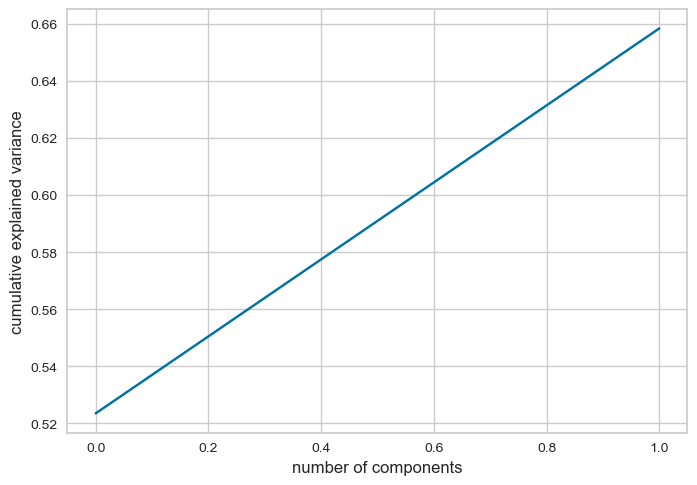

In [62]:
# b. Plotting explained_variance_ratio with dimension
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [63]:
#Initiating PCA to reduce dimentions aka features to 5
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  918.0  0.000000e+00  2.610156 -3.263822 -1.487950 -0.927639 -0.223066   
col2  918.0  0.000000e+00  1.325177 -2.844280 -0.673872  0.382293  0.683791   
col3  918.0  3.096047e-17  1.110307 -1.057515 -0.629531 -0.331670  0.311796   

           max  
col1  6.367199  
col2  3.785217  
col3  7.461569

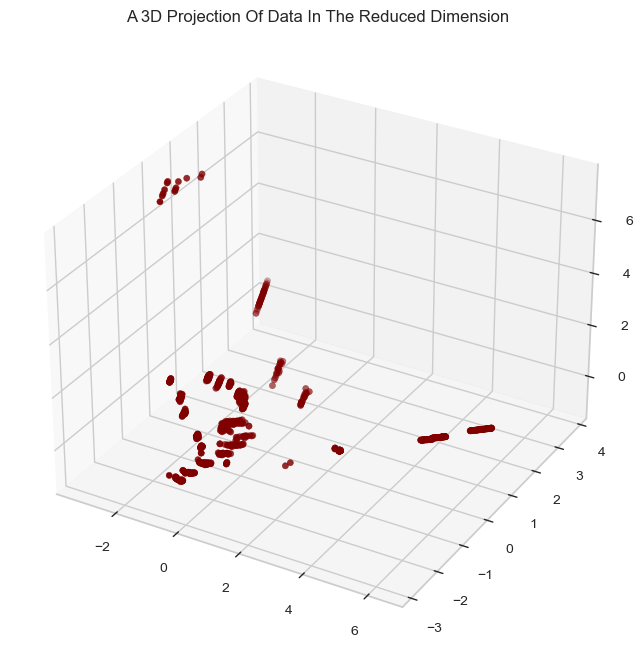

In [64]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [65]:
# pip install yellowbrick

In [66]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


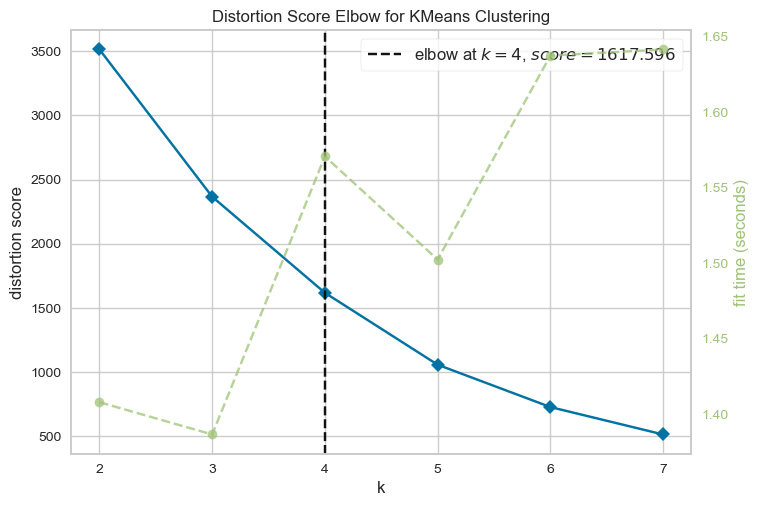

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=7)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [68]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_ds)
scaled_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df1["Clusters"]= yhat_AC

In [69]:
cmap = plt.cm.viridis

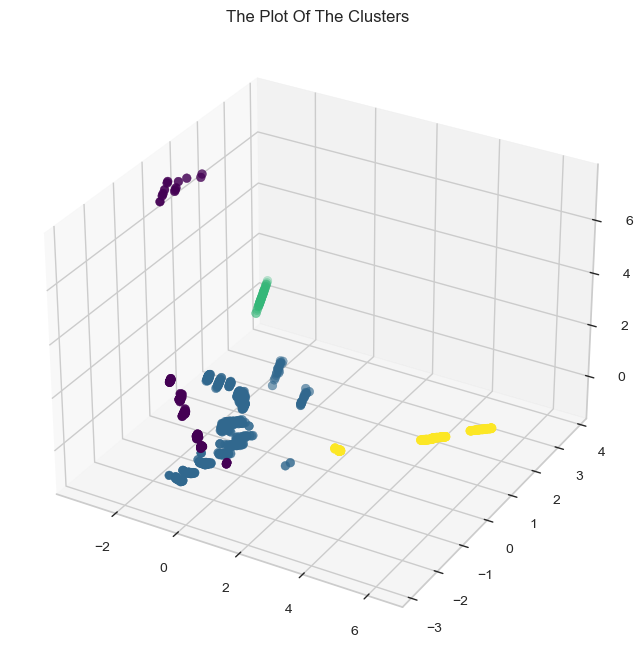

In [70]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=scaled_ds["Clusters"], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

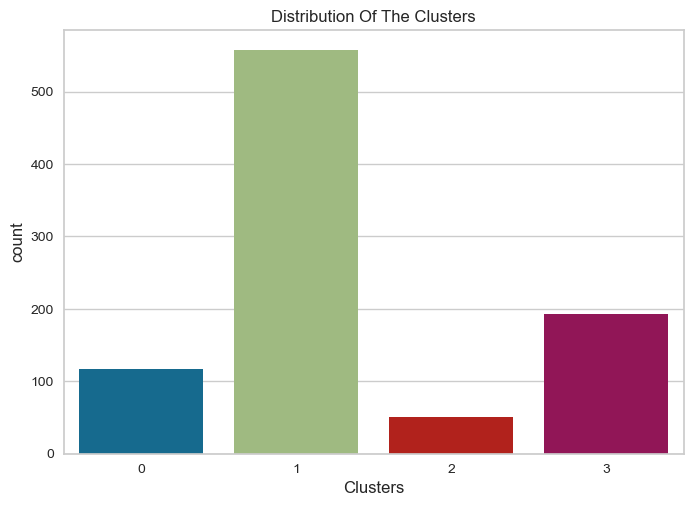

In [71]:
#Plotting countplot of clusters
pl = sns.countplot(x=df1["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [72]:
df1.columns

Index(['Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature', 'Fmax', 'IFSS', 'Clusters'],
      dtype='object')

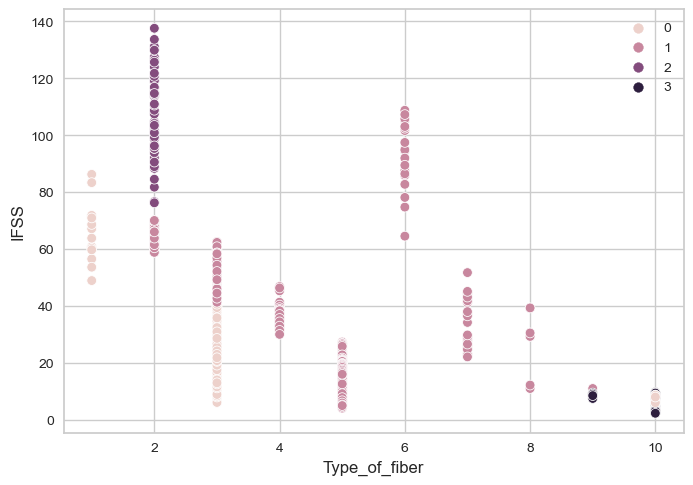

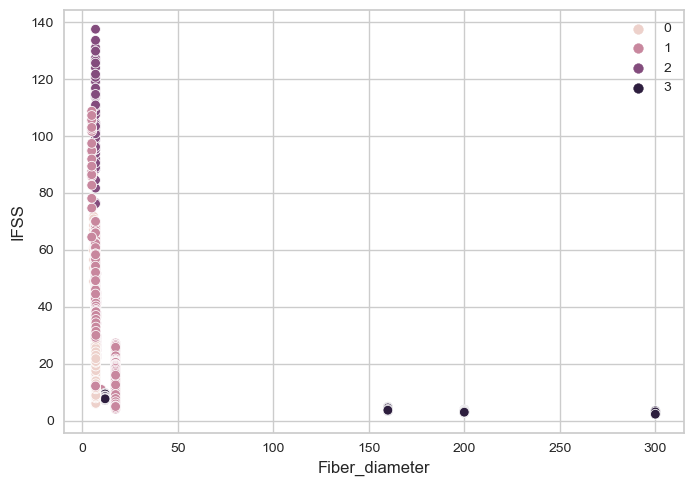

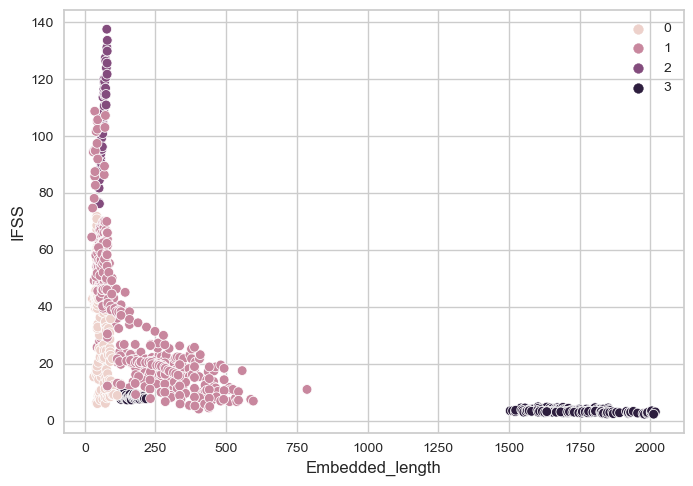

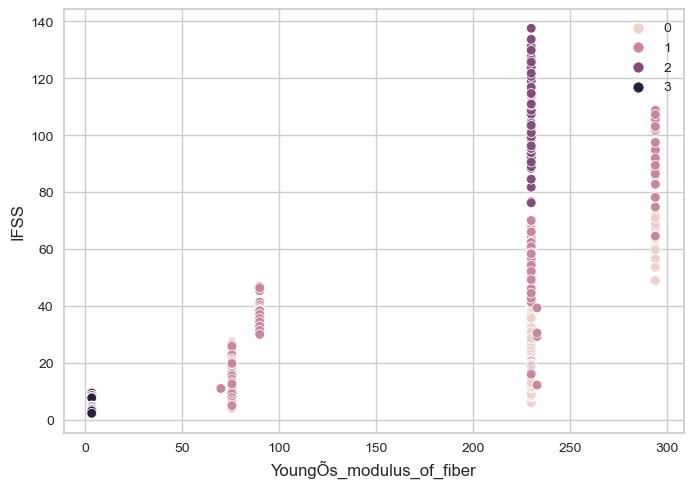

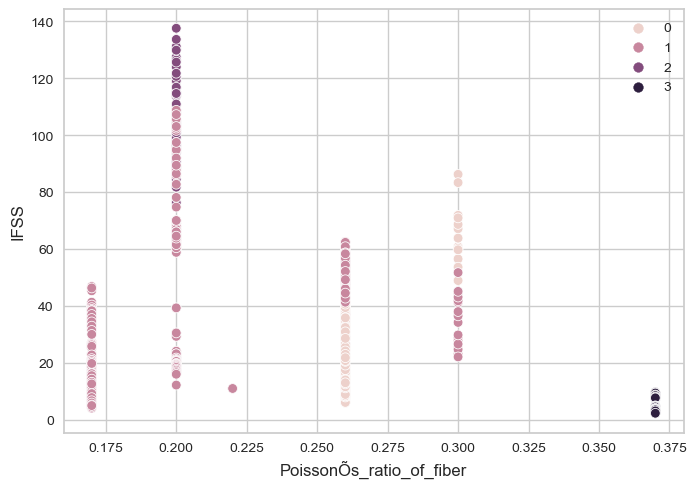

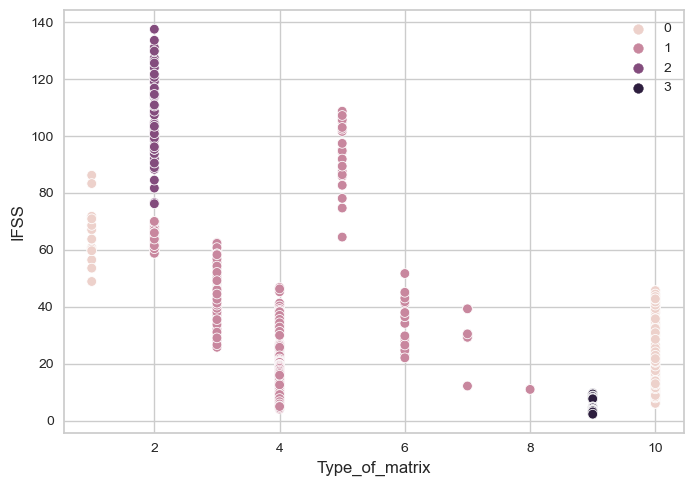

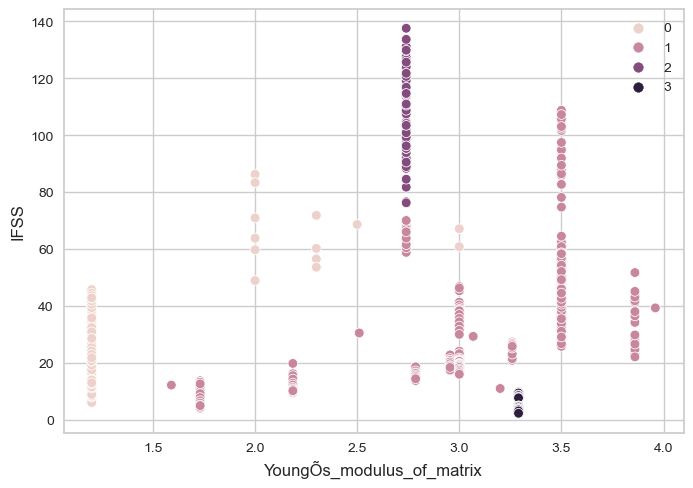

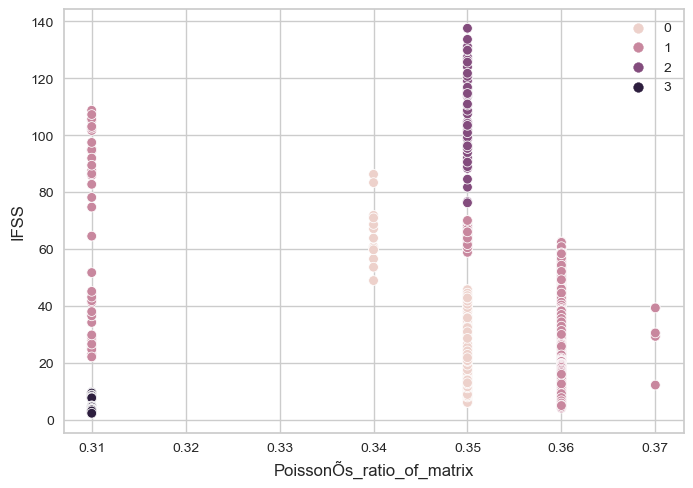

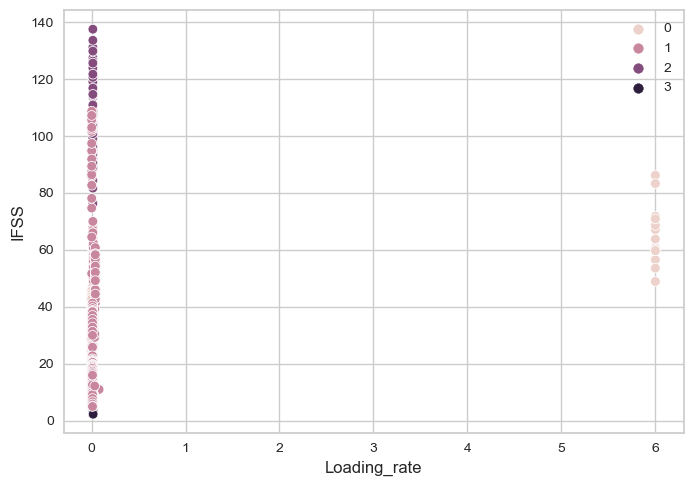

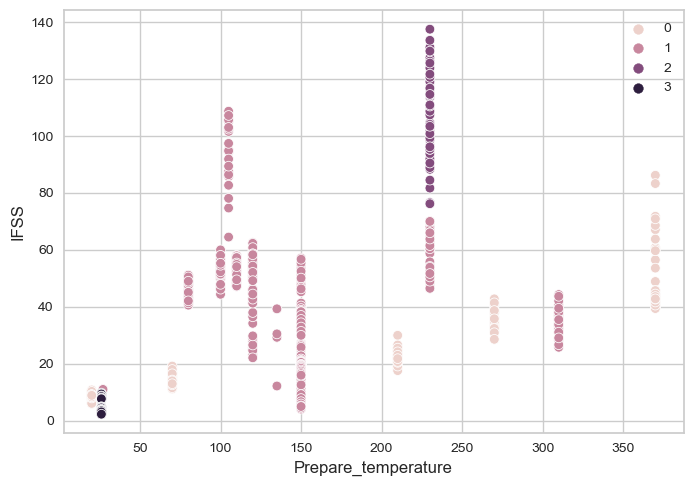

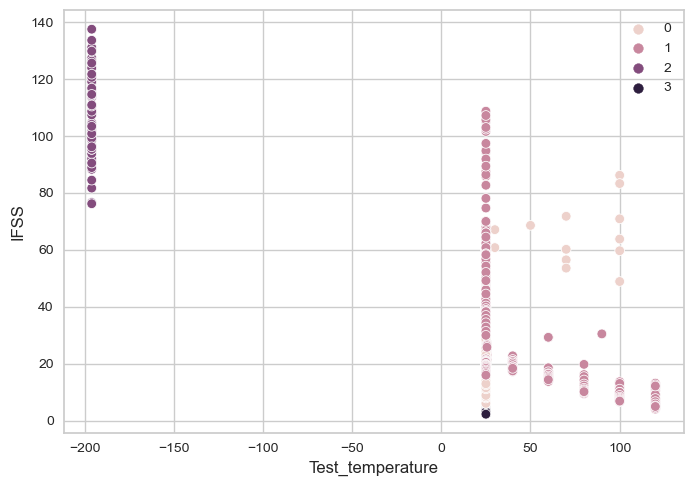

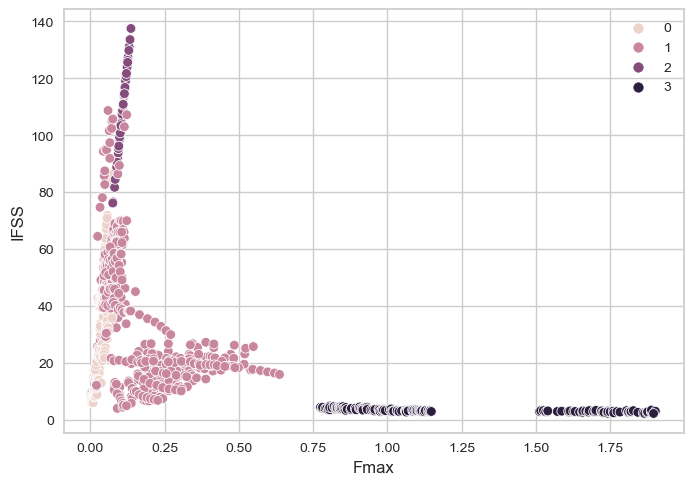

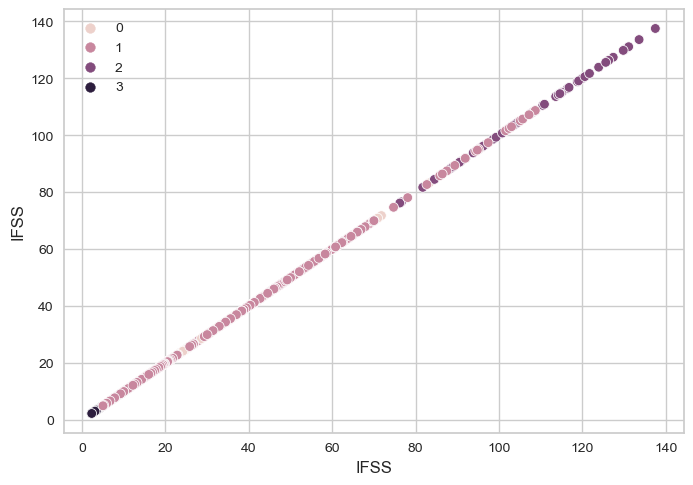

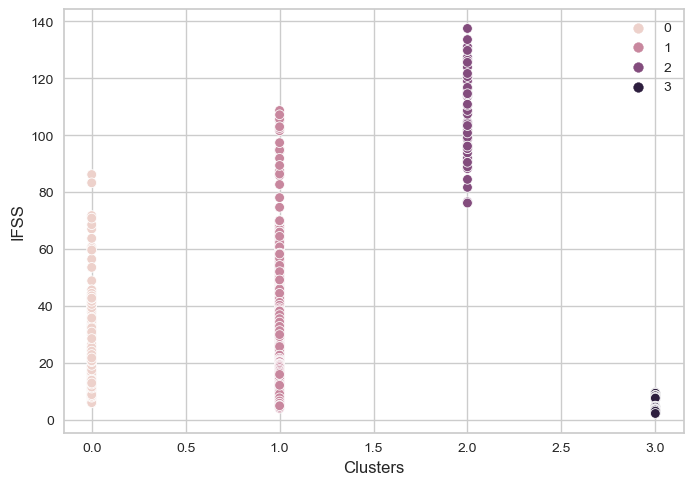

In [73]:
for feature in df1:
    pl = sns.scatterplot(data = data,x=df1[feature], y=data["IFSS"],hue=df1["Clusters"])
    plt.legend()
    plt.show()

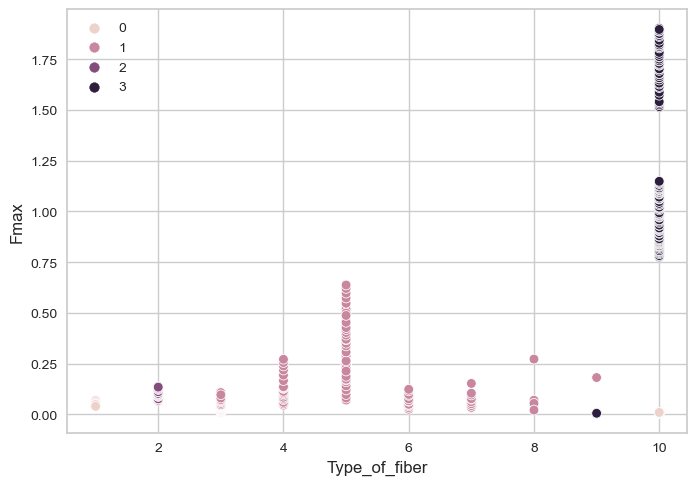

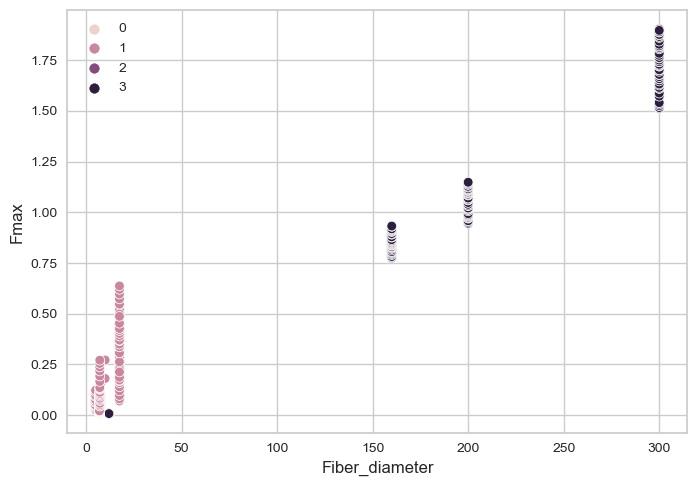

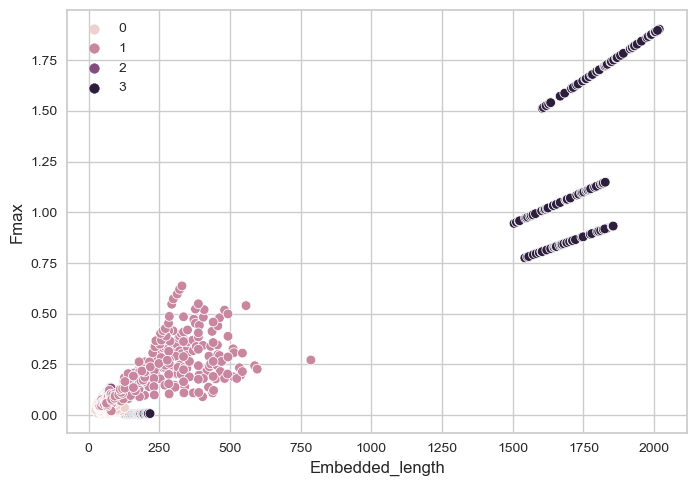

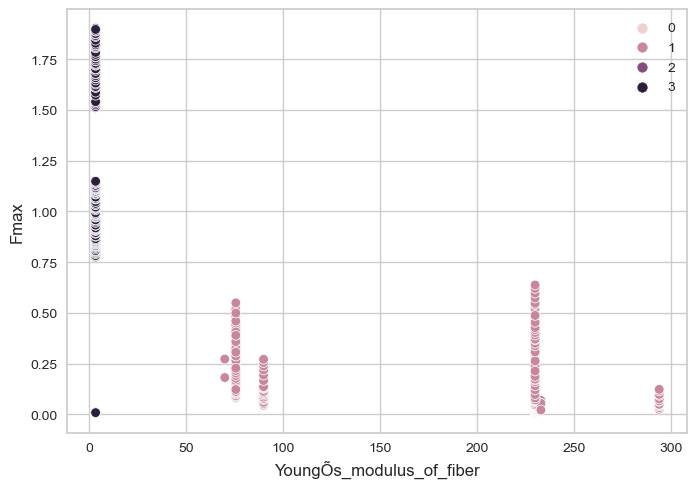

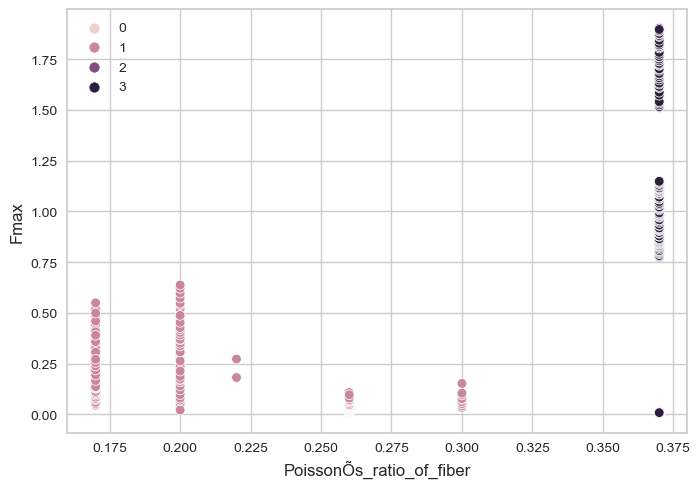

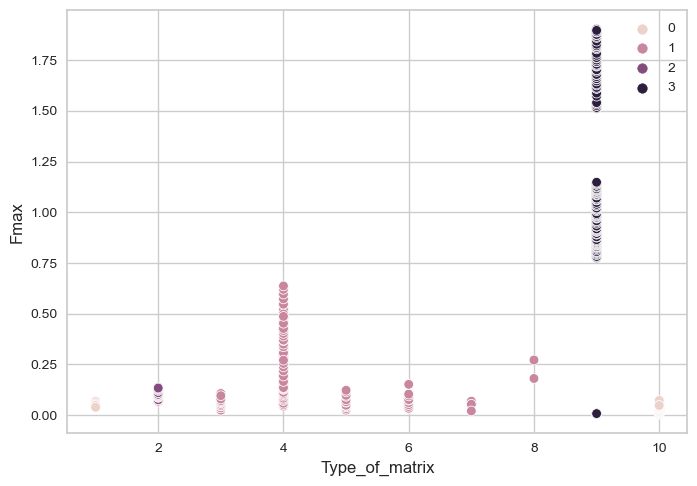

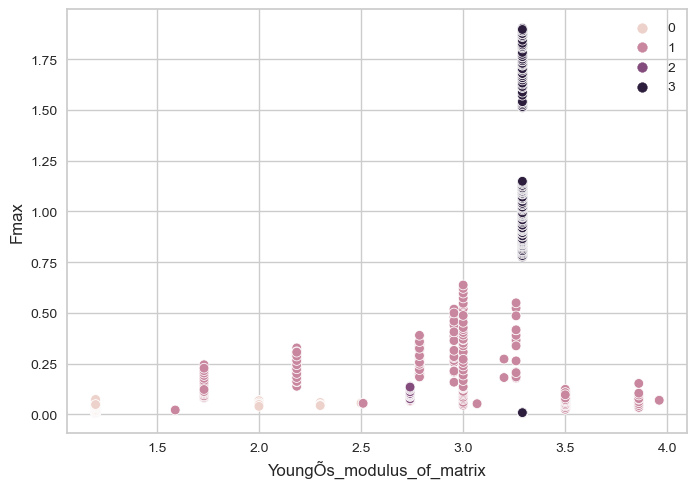

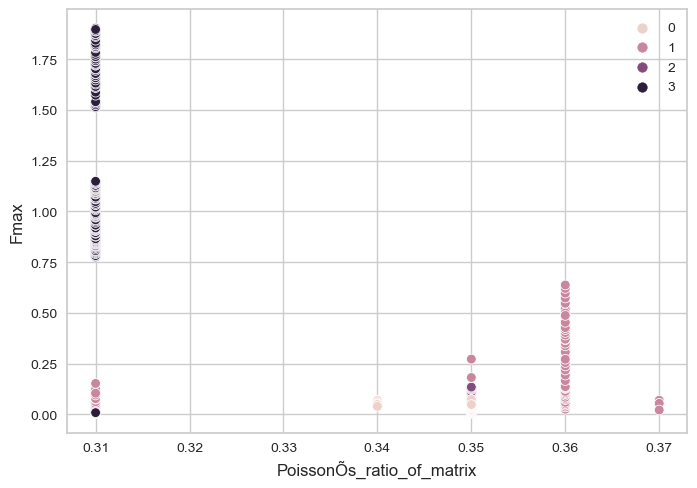

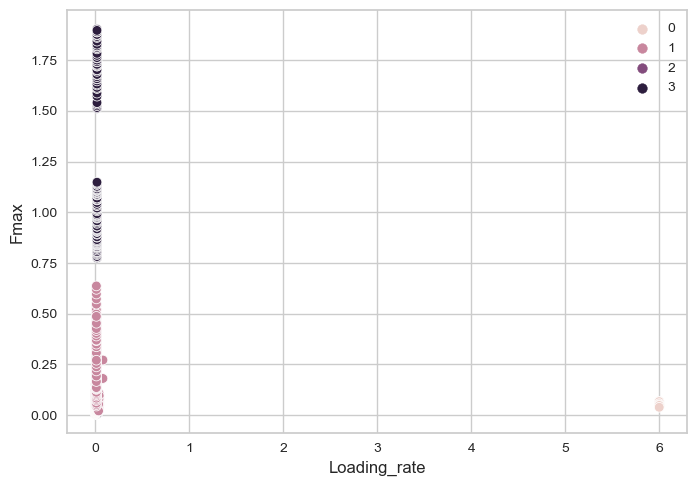

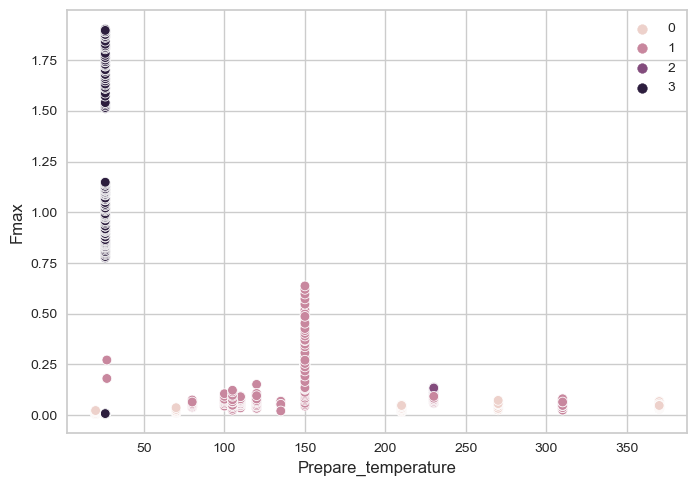

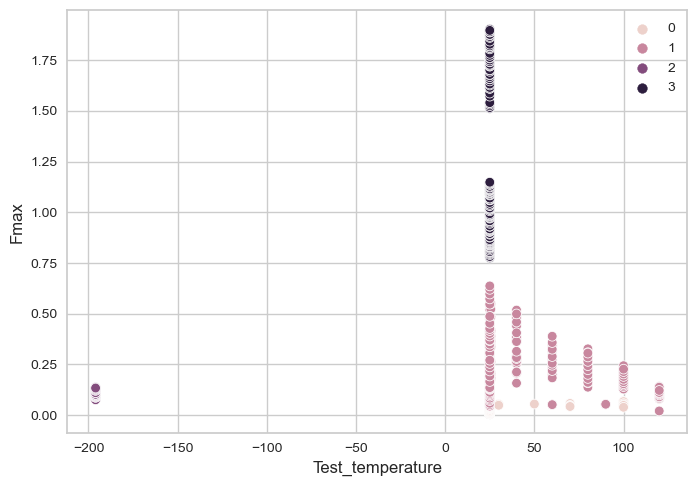

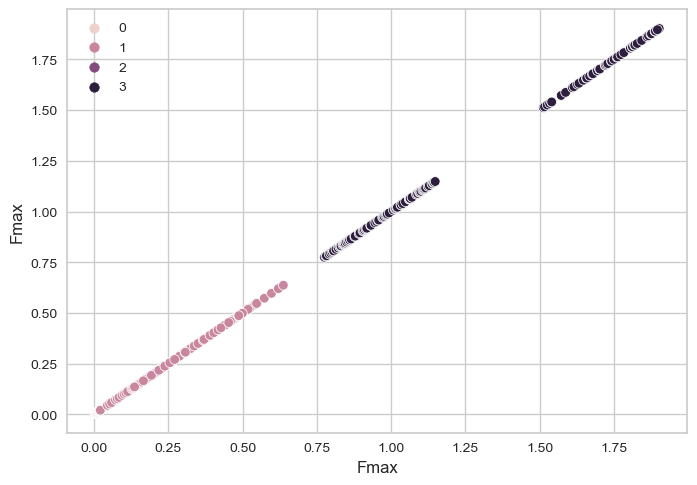

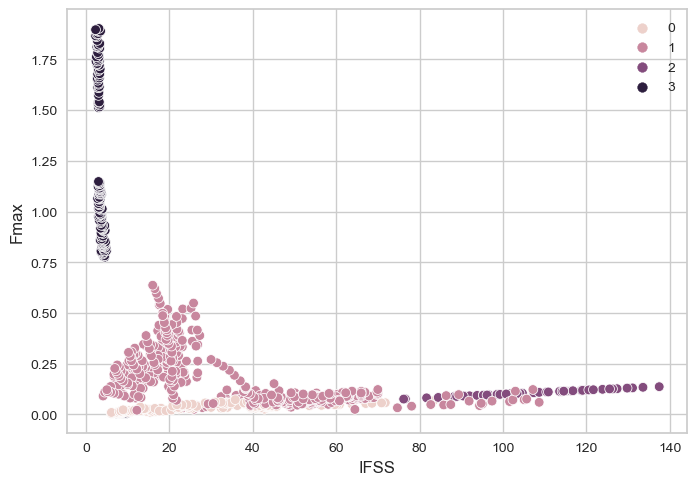

KeyError: 'Clusters'

In [74]:
for feature in df1:
    pl = sns.scatterplot(data = data,x=df[feature], y=data["Fmax"],hue=df1["Clusters"])
    plt.legend()
    plt.show()

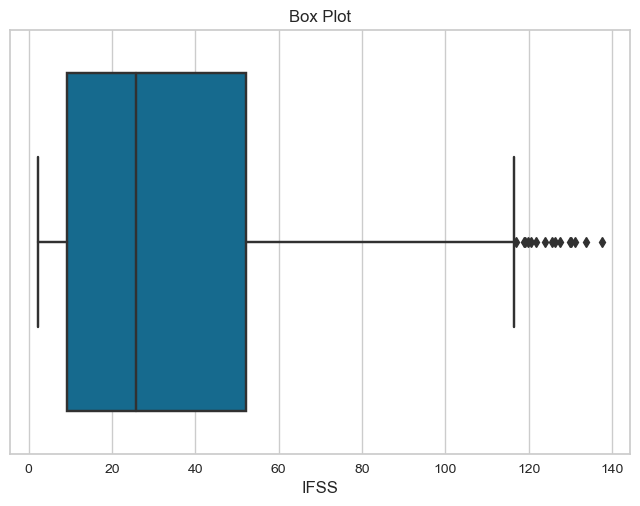

In [75]:
# Import libraries
import matplotlib.pyplot as plt


# fig = plt.figure(figsize =(10, 7))

# # Creating plot
# plt.boxplot(df2['Fatigue'])


# plt.ylabel('Fatigue')
# plt.title('Box Plot')
# # show plot
# plt.show()

sns.boxplot(x=df["IFSS"])

# plt.ylabel('Fatigue')
plt.title('Box Plot')
# show plot
# show plot
plt.show()

In [76]:
scaled_ds.head()

Type_of_fiber  Fiber_diameter  Embedded_length  YoungÕs_modulus_of_fiber  \
0      -1.415132       -0.465988         -0.58598                  1.391371   
1      -1.415132       -0.465988         -0.58598                  1.391371   
2      -1.415132       -0.465988         -0.58598                  1.391371   
3      -1.415132       -0.465988         -0.58598                  1.391371   
4      -1.415132       -0.465988         -0.58598                  1.391371   

   PoissonÕs_ratio_of_fiber  Type_of_matrix  YoungÕs_modulus_of_matrix  \
0                  0.650081       -1.475013                   0.165694   
1                  0.650081       -1.475013                   0.165694   
2                  0.650081       -1.475013                  -0.496102   
3                  0.650081       -1.475013                  -0.760821   
4                  0.650081       -1.475013                  -0.760821   

   PoissonÕs_ratio_of_matrix  Loading_rate  Prepare_temperature  \
0                  -0.235155      8.342985             2.587999   
1                  -0.235155      8.342985             2.587999   
2                  -0.235155      8.342985             2.587999   
3                  -0.235155      8.342985             2.587999   
4                  -0.235155      8.342985             2.587999   

   Test_temperature      Fmax      IFSS  Clusters  
0          0.160868 -0.544295  1.152307         0  
1          0.160868 -0.555527  0.932261         0  
2          0.512631 -0.542049  1.204699         0  
3          0.864393 -0.535310  1.316468         0  
4          0.864393 -0.557773  0.911304         0

In [77]:
x=df.drop(['Fmax','IFSS','No.'],axis=1)
x_scaled=scaled_ds.drop(['IFSS','Fmax'],axis=1)
y=df['IFSS']

In [78]:
x_scaled

Type_of_fiber  Fiber_diameter  Embedded_length  YoungÕs_modulus_of_fiber  \
0        -1.415132       -0.465988        -0.585980                  1.391371   
1        -1.415132       -0.465988        -0.585980                  1.391371   
2        -1.415132       -0.465988        -0.585980                  1.391371   
3        -1.415132       -0.465988        -0.585980                  1.391371   
4        -1.415132       -0.465988        -0.585980                  1.391371   
..             ...             ...              ...                       ...   
913      -0.365503       -0.451215        -0.392562                 -0.667228   
914      -0.365503       -0.451215        -0.342454                 -0.667228   
915      -0.365503       -0.451215        -0.292346                 -0.667228   
916      -0.365503       -0.451215        -0.242237                 -0.667228   
917      -0.365503       -0.451215        -0.192129                 -0.667228   

     PoissonÕs_ratio_of_fiber  Type_of_matrix  YoungÕs_modulus_of_matrix  \
0                    0.650081       -1.475013                   0.165694   
1                    0.650081       -1.475013                   0.165694   
2                    0.650081       -1.475013                  -0.496102   
3                    0.650081       -1.475013                  -0.760821   
4                    0.650081       -1.475013                  -0.760821   
..                        ...             ...                        ...   
913                 -1.213944       -0.451792                   0.165694   
914                 -1.213944       -0.451792                   0.165694   
915                 -1.213944       -0.451792                   0.165694   
916                 -1.213944       -0.451792                   0.165694   
917                 -1.213944       -0.451792                   0.165694   

     PoissonÕs_ratio_of_matrix  Loading_rate  Prepare_temperature  \
0                    -0.235155      8.342985             2.587999   
1                    -0.235155      8.342985             2.587999   
2                    -0.235155      8.342985             2.587999   
3                    -0.235155      8.342985             2.587999   
4                    -0.235155      8.342985             2.587999   
..                         ...           ...                  ...   
913                   0.726413     -0.125479             0.125618   
914                   0.726413     -0.125479             0.125618   
915                   0.726413     -0.125479             0.125618   
916                   0.726413     -0.125479             0.125618   
917                   0.726413     -0.125479             0.125618   

     Test_temperature  Clusters  
0            0.160868         0  
1            0.160868         0  
2            0.512631         0  
3            0.864393         0  
4            0.864393         0  
..                ...       ...  
913          0.072927         1  
914          0.072927         1  
915          0.072927         1  
916          0.072927         1  
917          0.072927         1  

[918 rows x 12 columns]

In [79]:
x

Type_of_fiber  Fiber_diameter  Embedded_length  YoungÕs_modulus_of_fiber  \
0              1.0             6.0             42.5                     294.0   
1              1.0             6.0             42.5                     294.0   
2              1.0             6.0             42.5                     294.0   
3              1.0             6.0             42.5                     294.0   
4              1.0             6.0             42.5                     294.0   
..             ...             ...              ...                       ...   
917            4.0             7.2            158.3                      90.0   
918            4.0             7.2            188.3                      90.0   
919            4.0             7.2            218.3                      90.0   
920            4.0             7.2            248.3                      90.0   
921            4.0             7.2            278.3                      90.0   

     PoissonÕs_ratio_of_fiber  Type_of_matrix  YoungÕs_modulus_of_matrix  \
0                        0.30               1                        3.0   
1                        0.30               1                        3.0   
2                        0.30               1                        2.5   
3                        0.30               1                        2.3   
4                        0.30               1                        2.3   
..                        ...             ...                        ...   
917                      0.17               4                        3.0   
918                      0.17               4                        3.0   
919                      0.17               4                        3.0   
920                      0.17               4                        3.0   
921                      0.17               4                        3.0   

     PoissonÕs_ratio_of_matrix  Loading_rate  Prepare_temperature  \
0                         0.34          6.00                  370   
1                         0.34          6.00                  370   
2                         0.34          6.00                  370   
3                         0.34          6.00                  370   
4                         0.34          6.00                  370   
..                         ...           ...                  ...   
917                       0.36          0.01                  150   
918                       0.36          0.01                  150   
919                       0.36          0.01                  150   
920                       0.36          0.01                  150   
921                       0.36          0.01                  150   

     Test_temperature  
0                30.0  
1                30.0  
2                50.0  
3                70.0  
4                70.0  
..                ...  
917              25.0  
918              25.0  
919              25.0  
920              25.0  
921              25.0  

[918 rows x 11 columns]

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [81]:
x_scaled=x_scaled.drop(['Clusters'],axis=1)

In [82]:
#Splitting data into training and testing such that there will be 763 training data points as given initially
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.226)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_scaled,y,test_size=0.226)

# LINEAR REGRESSION

In [83]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [84]:
lin_reg1=LinearRegression()
lin_reg1.fit(X_train1,y_train1)

lin_reg2=LinearRegression()
lin_reg2.fit(X_train2,y_train2)

LinearRegression()

In [85]:
lin_reg1.score(X_test1,y_test1)

0.9077777772490222

In [86]:
scores_lin_reg2['train_r2'].mean()

NameError: name 'scores_lin_reg2' is not defined

In [87]:
reg_pred2=lin_reg2.predict(X_test2)

In [88]:
reg_pred1=lin_reg1.predict(X_test1)

In [89]:
residual1=reg_pred1-y_test1

In [90]:
residual2=reg_pred2-y_test2

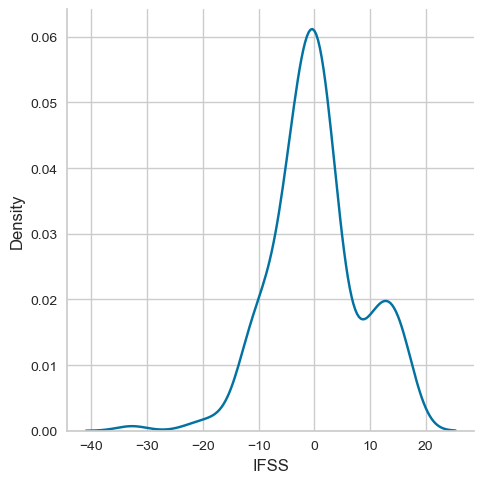

In [91]:
import seaborn as sns
sns.displot(reg_pred1-y_test1,kind='kde')

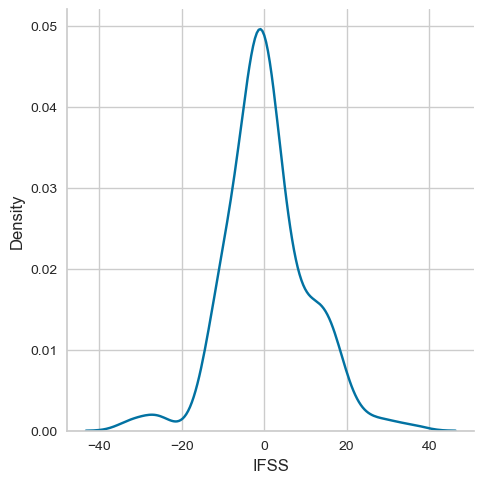

In [92]:
import seaborn as sns
sns.displot(reg_pred2-y_test2,kind='kde')

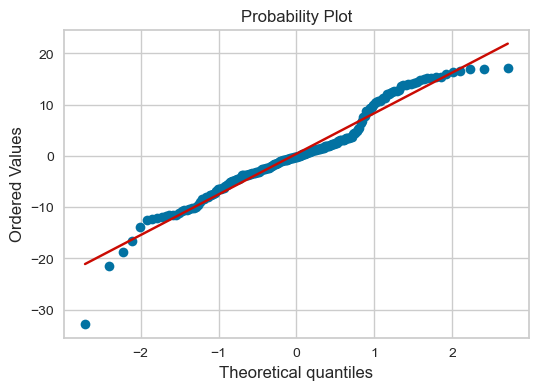

In [93]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual1, plot=ax, fit=True)

plt.show()

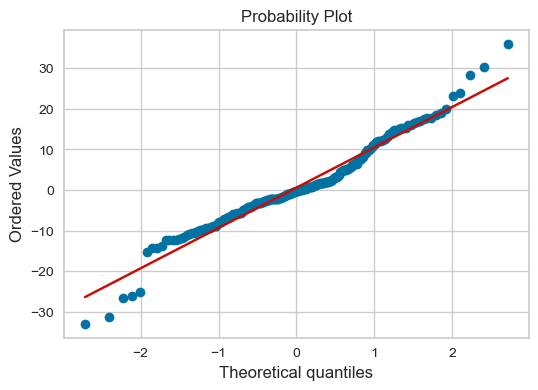

In [94]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual2, plot=ax, fit=True)

plt.show()

Text(0.5, 1.0, 'Homoscedasticity')

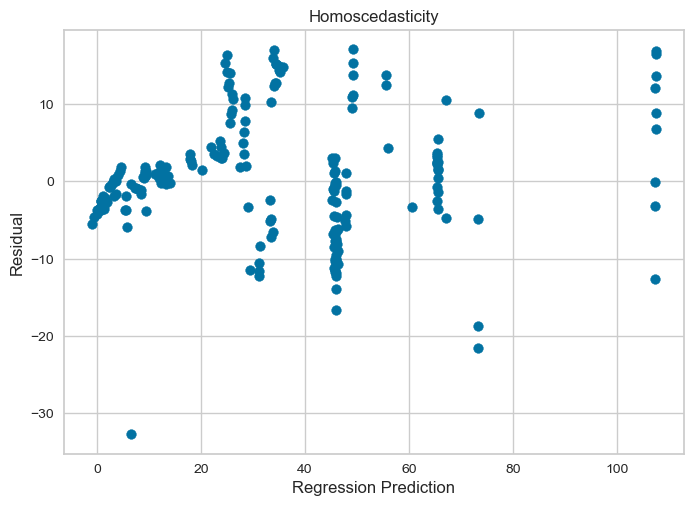

In [95]:
plt.scatter(reg_pred1,residual1)
plt.ylabel('Residual')
plt.xlabel('Regression Prediction')
plt.title('Homoscedasticity')

Text(0.5, 1.0, 'Homoscedasticity')

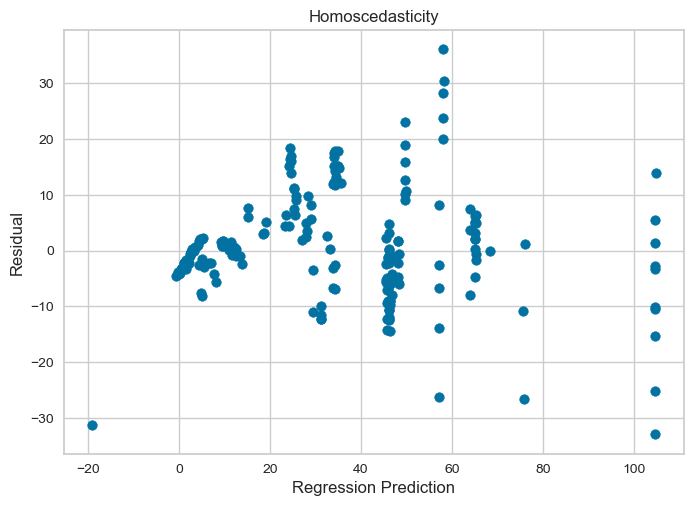

In [96]:
plt.scatter(reg_pred2,residual2)
plt.ylabel('Residual')
plt.xlabel('Regression Prediction')
plt.title('Homoscedasticity')

Text(0.5, 1.0, 'Autocorrelation of Residuals')

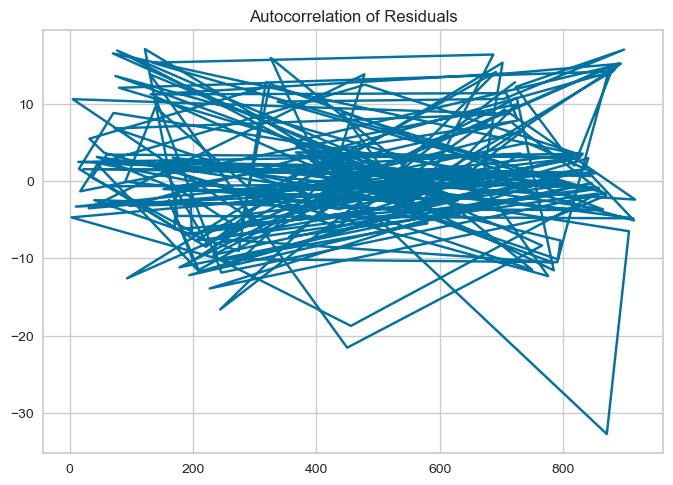

In [97]:
plt.plot(residual1)
plt.title('Autocorrelation of Residuals')

Text(0.5, 1.0, 'Autocorrelation of Residuals')

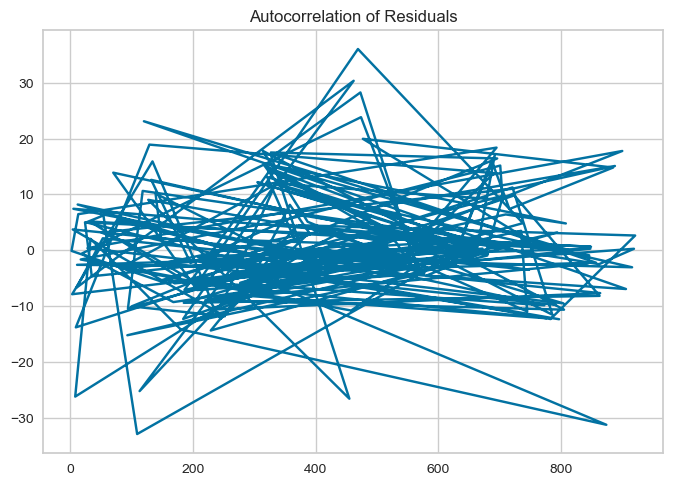

In [98]:
plt.plot(residual2)
plt.title('Autocorrelation of Residuals')

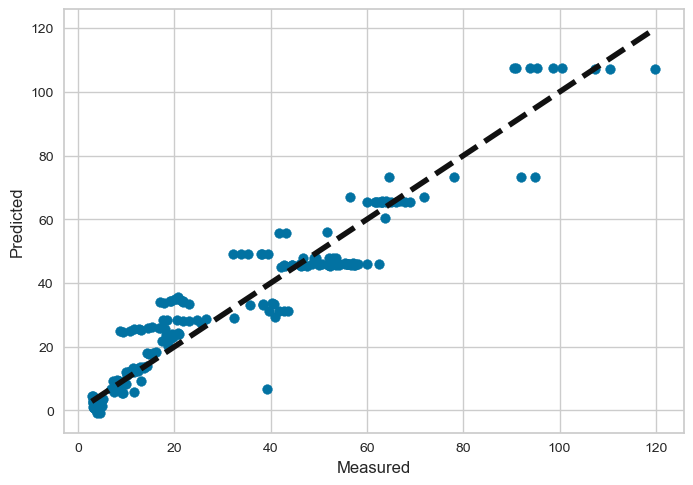

In [99]:
fig, ax = plt.subplots()
ax.scatter(y_test1,reg_pred1)
ax.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

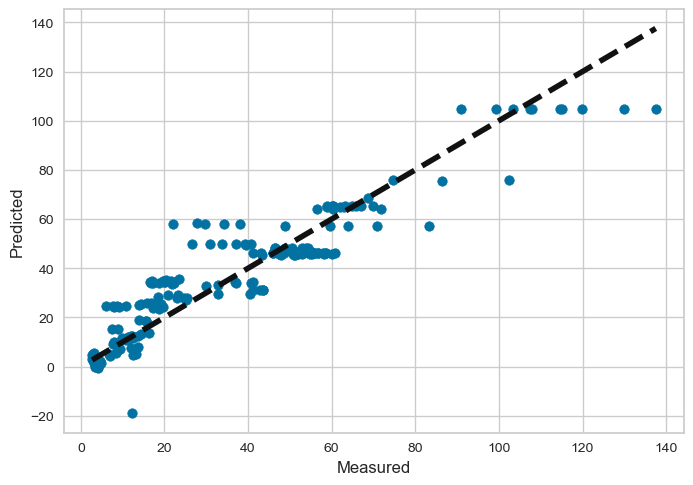

In [100]:
fig, ax = plt.subplots()
ax.scatter(y_test2,reg_pred2)
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [101]:
import sklearn.metrics as metrics
# calculate manually
d = y_test1-reg_pred1
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))
mape=np.mean(abs(d/y_test1))
print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("MAPE:", mape)

Results by manual calculation:
MAE: 5.936788254471048
MSE: 63.98546568084986
RMSE: 7.9990915534734235
MAPE: 0.2974675467413896


In [102]:
import sklearn.metrics as metrics
# calculate manually
d = y_test2-reg_pred2
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)

Results by manual calculation:
MAE: 7.266446840734302
MSE: 100.60894850682644
RMSE: 10.030401213651746


In [103]:
df.columns

Index(['No.', 'Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature', 'Fmax', 'IFSS'],
      dtype='object')

In [104]:
importances = lin_reg2.coef_

# print the feature importances
for feature, importance in zip(range(X_train2.shape[1]), importances):
    print('Feature %d: %f' % (feature, importance))

Feature 0: -14.893385
Feature 1: 2.561066
Feature 2: -5.239222
Feature 3: 6.540111
Feature 4: -5.424521
Feature 5: -7.060133
Feature 6: 3.687249
Feature 7: -17.180273
Feature 8: -0.722774
Feature 9: 1.676454
Feature 10: -10.180526


In [105]:
abs(importances)

array([14.89338528,  2.56106592,  5.23922176,  6.5401109 ,  5.42452136,
        7.06013252,  3.68724876, 17.18027301,  0.72277356,  1.67645373,
       10.18052581])

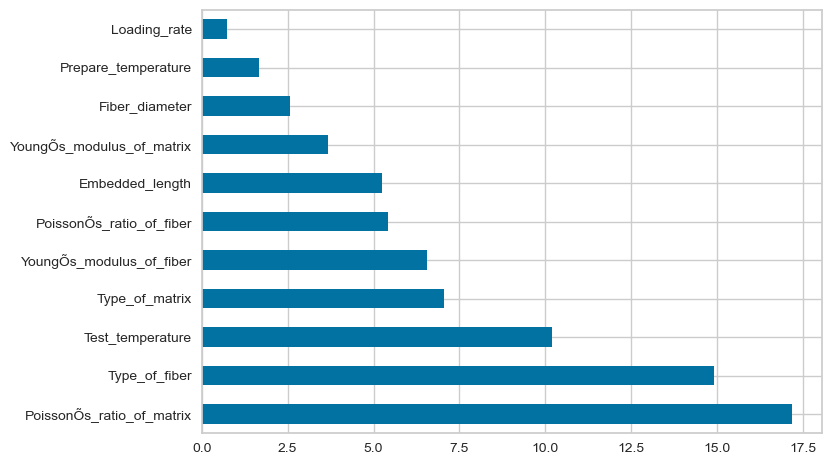

In [106]:
#feature imp for lin reg
feat_importances = pd.Series(abs(importances), index=X_train2.columns)
feat_importances.nlargest(26).plot(kind='barh')
plt.show()

In [107]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score


# Create a Lasso regression object
lasso = Lasso()

# Define a grid of hyperparameters to search over
param_grid = {'alpha': [0.0001,0.001,0.006, 0.01, 0.1, 1, 10, 100]}

# Create a grid search object to search over the hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)

# Fit the grid search object on the training data
grid_search.fit(X_train2, y_train2)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']


In [108]:
grid_search.score(X_test2, y_test2)

0.8761554784045498

In [109]:
print("Best Alpha:", best_alpha)

Best Alpha: 0.1


In [110]:

# Create a Lasso regression object with alpha = 0.1
lasso = Lasso(alpha=best_alpha)

# Fit the Lasso regression model on the training data
lasso.fit(X_train2, y_train2)

# Predict the test data using the fitted model
y_pred = lasso.predict(X_test2)

# Evaluate the performance of the model using R^2 score
r2 = r2_score(y_test2, y_pred)
print("R^2 score:", r2)

# Extract the coefficients and their corresponding feature names
coef = lasso.coef_
feature_names_lasso = X_train1.columns

# Print the coefficients and their corresponding feature names
for feature, coef in zip(feature_names_lasso, coef):
    print(coef)

R^2 score: 0.8761554784045498
-14.189587916836453
0.15134954340286808
-2.8603979431987177
6.827345974648198
-4.681409036280733
-7.260994873305336
3.3671357000992734
-16.256436118575138
-0.41624001473331107
1.5852241000381782
-10.36224259692969


In [111]:
import sklearn.metrics as metrics
# calculate manually
lasso_pred=lasso.predict(X_test2)
d = y_test2-lasso_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)

Results by manual calculation:
MAE: 7.130697728147476
MSE: 100.01536807832463
RMSE: 10.000768374396271


In [112]:
df.columns

Index(['No.', 'Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature', 'Fmax', 'IFSS'],
      dtype='object')

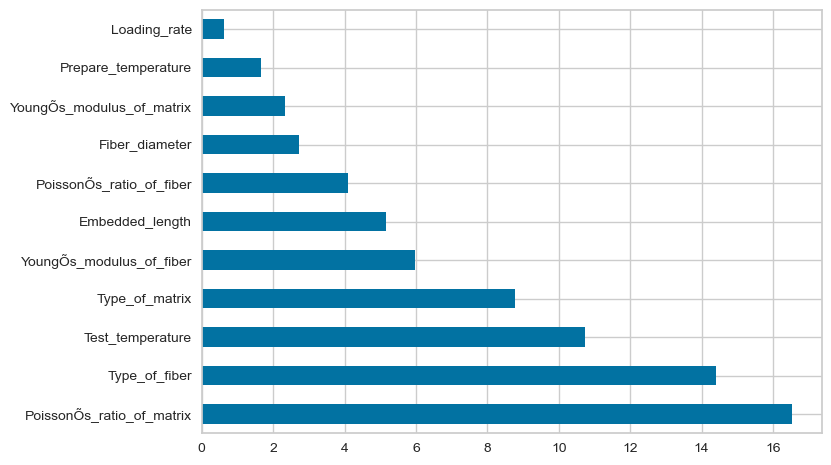

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of values
values = np.array([-14.400169370348229,
2.726192643473657,
-5.169373282017376,
5.981131817568845,
-4.100868897527005,
-8.774438782566248,
2.329928577322115,
-16.536686723581756,
-0.6128741703799935,
1.6559179899811012,
-10.744365591443193])

# Create an array of labels
labels = np.array(['Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature'])


feat_importances_lasso= pd.Series(abs(values), index=X_train2.columns)
feat_importances_lasso.nlargest(26).plot(kind='barh')
plt.show()


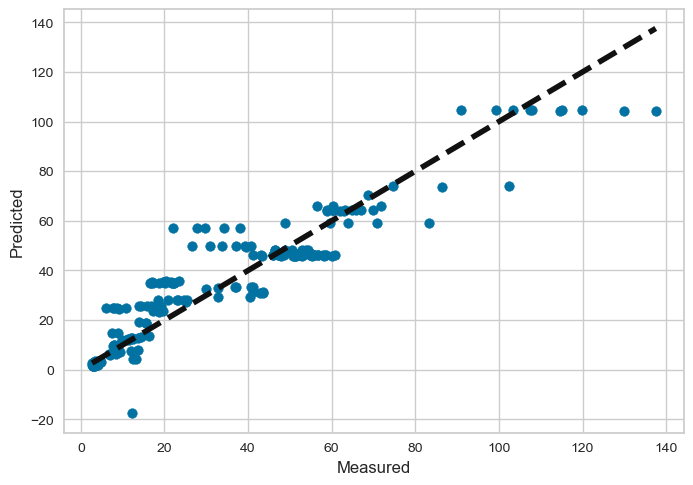

In [118]:
fig, ax = plt.subplots()
ax.scatter(y_test2,lasso_pred)
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

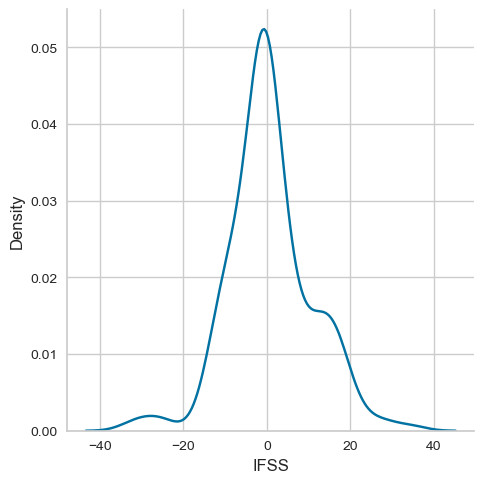

In [119]:
import seaborn as sns
lasso_pred=lasso.predict(X_test2)
sns.displot(lasso_pred-y_test2,kind='kde')

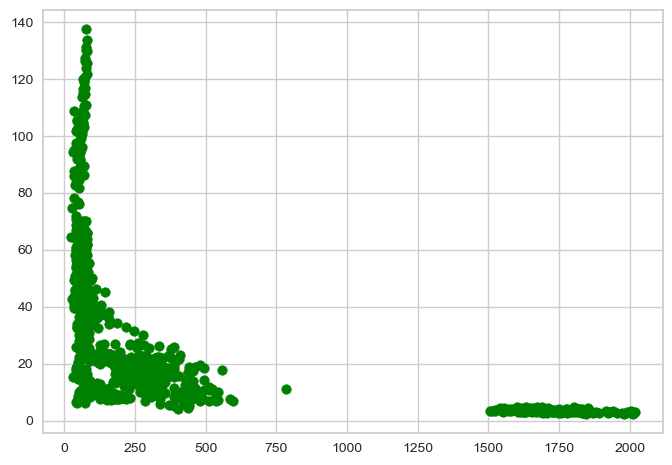

Text(0.5, 1.0, 'Simple linear regression')

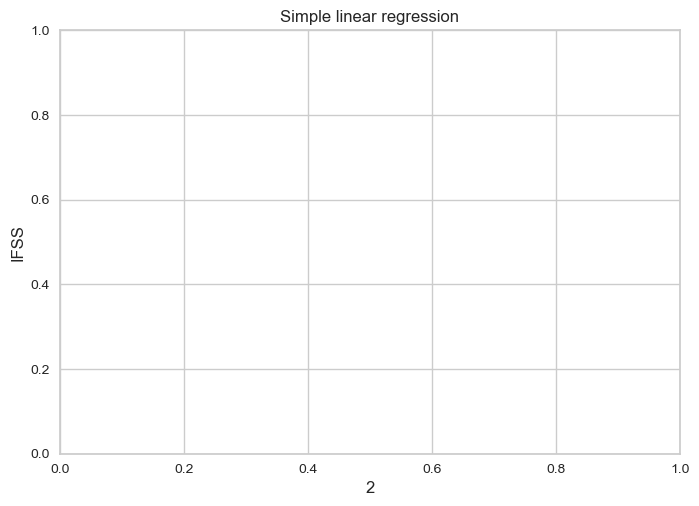

In [120]:
plt.scatter(df['Embedded_length'], y, color='green')
plt.show()
plt.ylabel("IFSS")
plt.xlabel(i)
plt.title('Simple linear regression')

In [121]:
df.columns

Index(['No.', 'Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature', 'Fmax', 'IFSS'],
      dtype='object')

# FORWARD SELECTION

Text(0.5, 1.0, 'Simple linear regression')

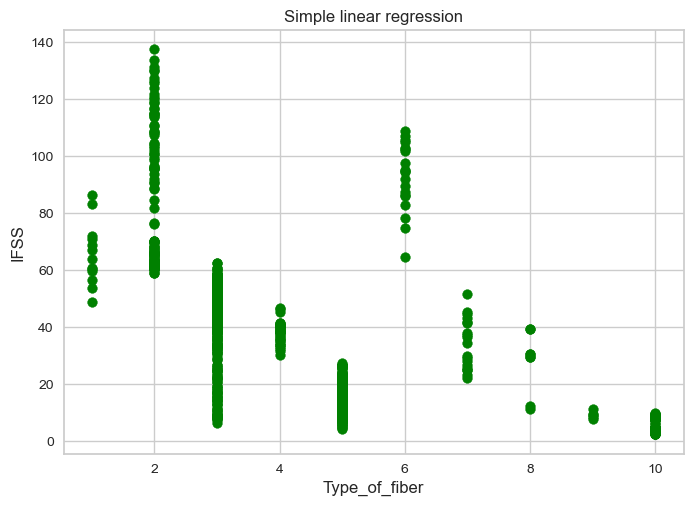

In [122]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['Type_of_fiber'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('Type_of_fiber')
plt.title('Simple linear regression')

([<matplotlib.axis.XTick at 0x28449609750>,
 [Text(0, 0, 'F1'),
  Text(1, 0, 'F2 '),
  Text(2, 0, 'F3'),
  Text(3, 0, 'F4'),
  Text(4, 0, 'F5')])

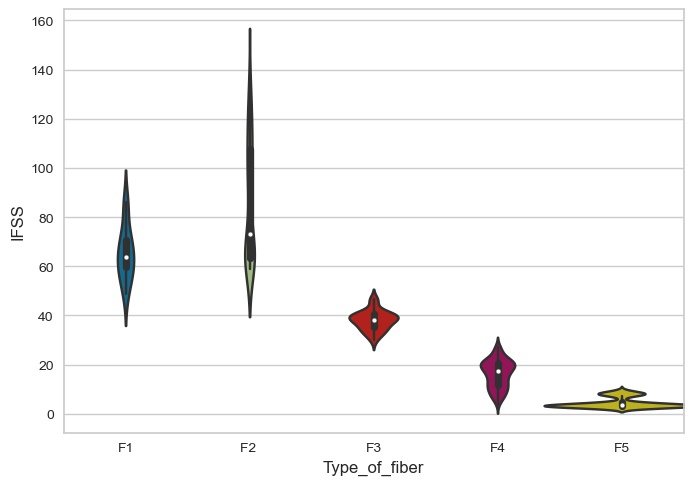

In [123]:

sns.violinplot(data=df[(df['Type_of_fiber']!=3) & (df['Type_of_fiber']!=6) & (df['Type_of_fiber']!=7) & (df['Type_of_fiber']!=8) & (df['Type_of_fiber']!=9)], x="Type_of_fiber", y="IFSS",gridsize=100, width=1.25)
N=5
ind = np.arange(N)  
plt.xticks(ind, ('F1', 'F2 ', 'F3', 'F4','F5'))
#F1-CF-230, 2-CF-294, 3-GF-90, 4-GF-75, 5-Polyamide-2.4

Text(0.5, 1.0, 'Simple linear regression')

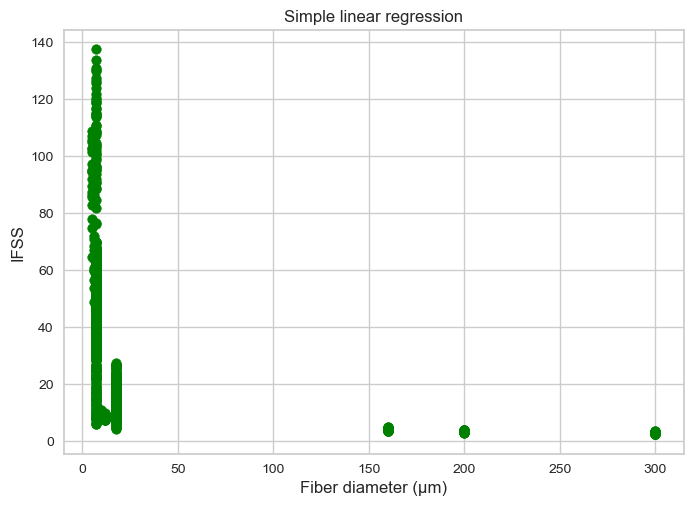

In [124]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['Fiber_diameter'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('Fiber diameter (µm)')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

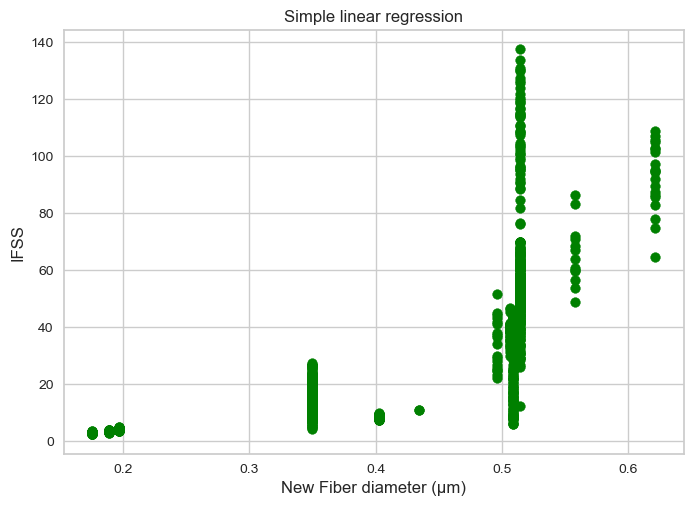

In [125]:
# Scatter plot of Trg vs 1st correlated feature
New_Fiber_diameter=1/np.log(df['Fiber_diameter'])
df['New_Fiber_diameter']=New_Fiber_diameter
plt.scatter(New_Fiber_diameter,y,color='green')
plt.ylabel('IFSS')
plt.xlabel('New Fiber diameter (µm)')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

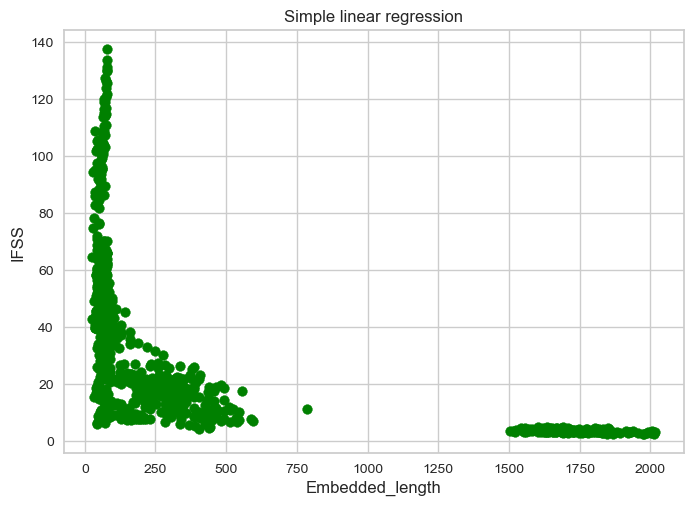

In [126]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['Embedded_length'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('Embedded_length')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

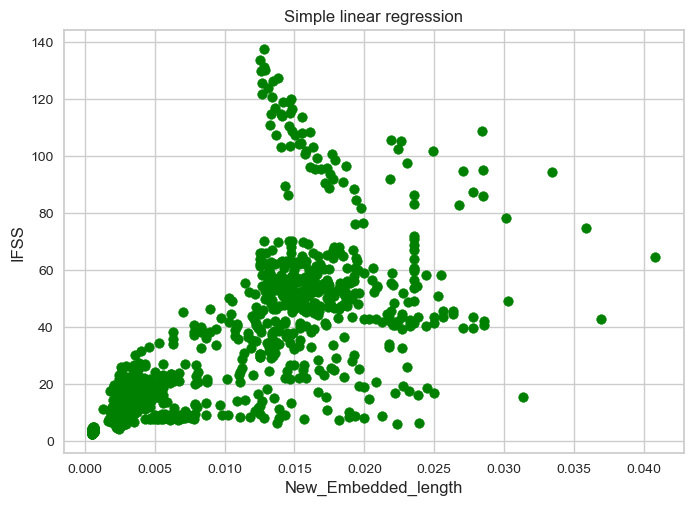

In [127]:
# Scatter plot of Trg vs 1st correlated feature
New_Embedded_length=1/df['Embedded_length']
df['New_Embedded_length']=New_Embedded_length
plt.scatter(New_Embedded_length,y,color='green')
plt.ylabel('IFSS')
plt.xlabel('New_Embedded_length')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

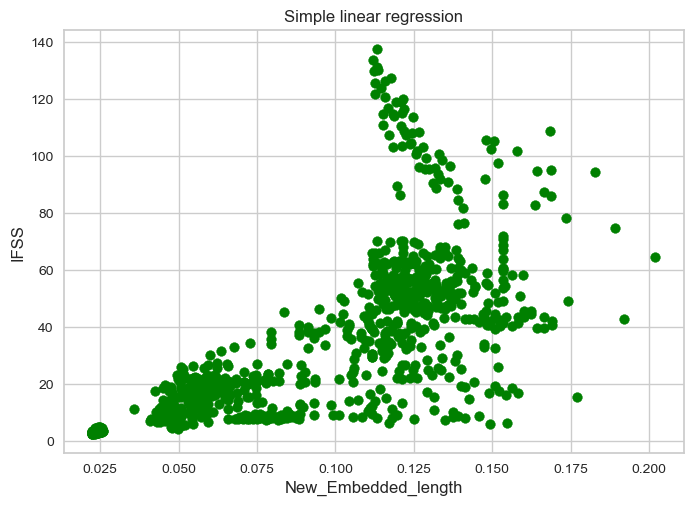

In [128]:
# Scatter plot of Trg vs 1st correlated feature
New_Embedded_length=1/pow((df['Embedded_length']),0.5)
df['New_Embedded_length']=New_Embedded_length
plt.scatter(New_Embedded_length,y,color='green')
plt.ylabel('IFSS')
plt.xlabel('New_Embedded_length')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

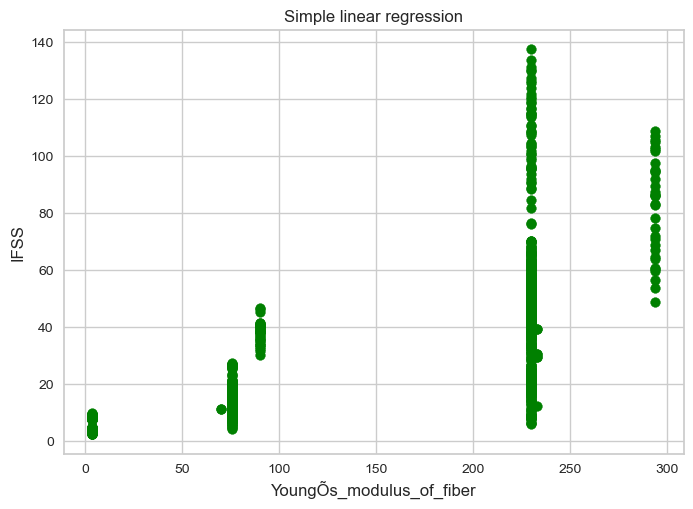

In [129]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['YoungÕs_modulus_of_fiber'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('YoungÕs_modulus_of_fiber')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

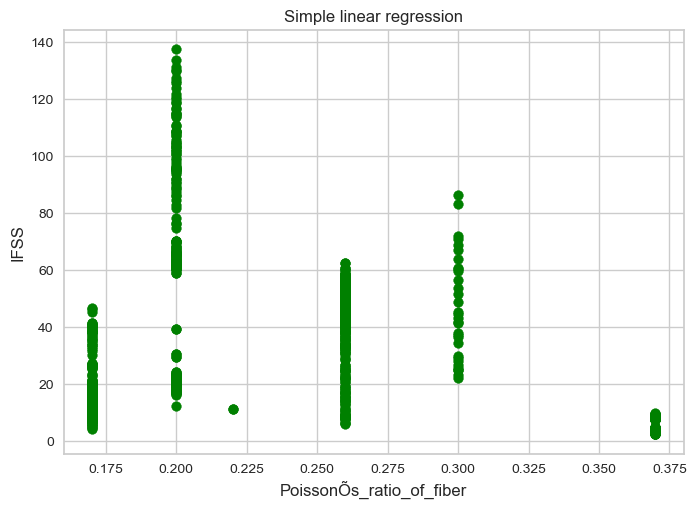

In [130]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['PoissonÕs_ratio_of_fiber'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('PoissonÕs_ratio_of_fiber')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

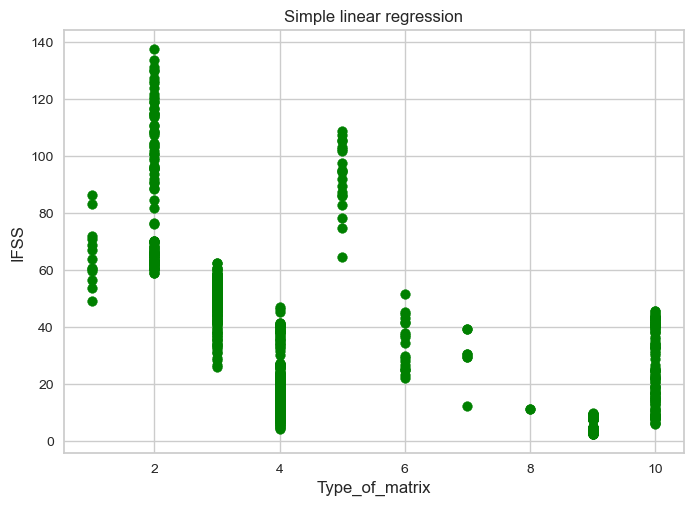

In [131]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['Type_of_matrix'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('Type_of_matrix')
plt.title('Simple linear regression')

([<matplotlib.axis.XTick at 0x28444c436d0>,
 [Text(0, 0, 'M1'),
  Text(1, 0, 'M2'),
  Text(2, 0, 'M3'),
  Text(3, 0, 'M4'),
  Text(4, 0, 'M5'),
  Text(5, 0, 'M6')])

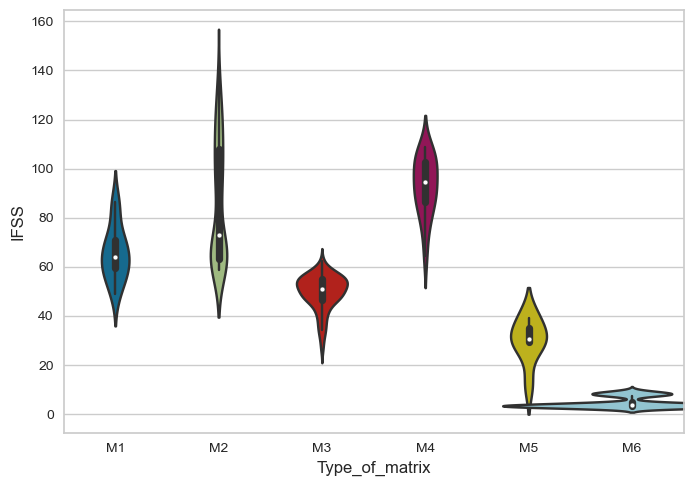

In [132]:
sns.violinplot(data=df[(df['Type_of_matrix']!=10) & (df['Type_of_matrix']!=8) & (df['Type_of_matrix']!=4) & (df['Type_of_matrix']!=6)], x="Type_of_matrix", y="IFSS",gridsize=100, width=2.5)
N=6
ind = np.arange(N)  
plt.xticks(ind, ('M1', 'M2', 'M3', 'M4', 'M5','M6'))
# 'PETG- Polyethylene Terephthalate Glycol(2.3 Gpa)', 'M-Epoxy(2.74 Gpa) ', 'Polyphenelene Sulphide (3.5 Gpa)', 'Bisphenol-A(3.5 Gpa)', 'Bisphenol-A(3.86 Gpa)','Polyamide(2Gpa)'))

Text(0.5, 1.0, 'Simple linear regression')

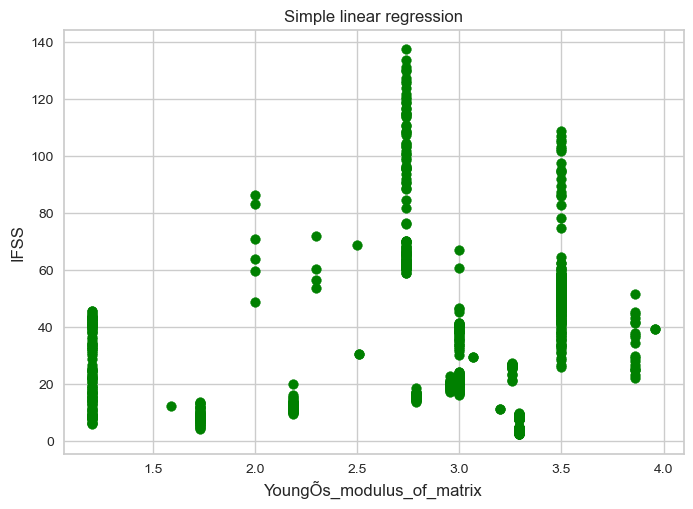

In [133]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['YoungÕs_modulus_of_matrix'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('YoungÕs_modulus_of_matrix')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

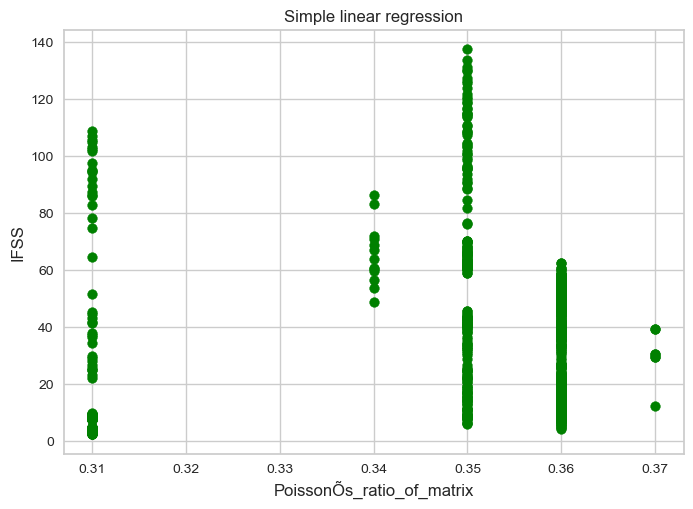

In [134]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['PoissonÕs_ratio_of_matrix'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('PoissonÕs_ratio_of_matrix')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

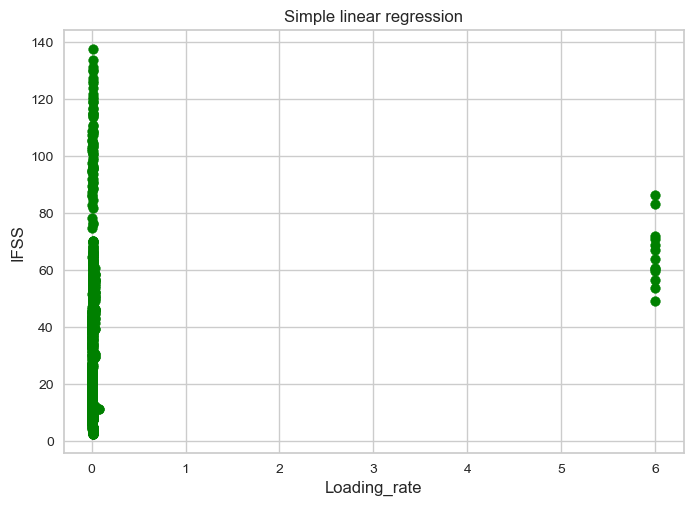

In [135]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['Loading_rate'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('Loading_rate')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

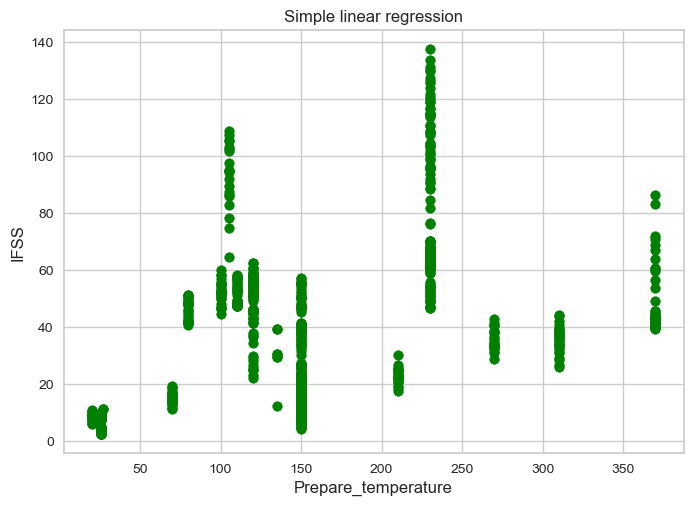

In [136]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['Prepare_temperature'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('Prepare_temperature')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

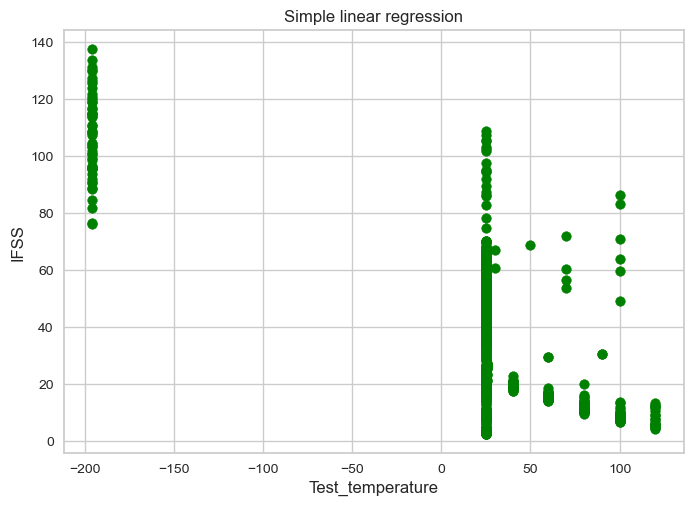

In [137]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['Test_temperature'],y,color='green')
plt.ylabel('IFSS')
plt.xlabel('Test_temperature')
plt.title('Simple linear regression')

In [138]:
from statsmodels.formula.api import ols

In [139]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~Fiber_diameter", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     268.0
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           4.95e-53
Time:                        15:17:54   Log-Likelihood:                -4264.2
No. Observations:                 918   AIC:                             8532.
Df Residuals:                     916   BIC:                             8542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.4625      0.946     43.

In [140]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     1004.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          2.13e-149
Time:                        15:17:54   Log-Likelihood:                -4042.2
No. Observations:                 918   AIC:                             8088.
Df Residuals:                     916   BIC:                             8098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -36.1104      2

In [141]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~Type_of_fiber", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     764.3
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          8.28e-123
Time:                        15:17:54   Log-Likelihood:                -4103.5
No. Observations:                 918   AIC:                             8211.
Df Residuals:                     916   BIC:                             8221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        68.1894      1.417     48.126

In [142]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~Embedded_length",data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     395.7
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.84e-73
Time:                        15:17:54   Log-Likelihood:                -4217.2
No. Observations:                 918   AIC:                             8438.
Df Residuals:                     916   BIC:                             8448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          44.4396      0.946     

In [143]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Embedded_length",data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     907.8
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          3.91e-139
Time:                        15:17:54   Log-Likelihood:                -4065.9
No. Observations:                 918   AIC:                             8136.
Df Residuals:                     916   BIC:                             8145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.0726    

In [144]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~YoungÕs_modulus_of_fiber", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     830.7
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          1.58e-130
Time:                        15:17:54   Log-Likelihood:                -4085.7
No. Observations:                 918   AIC:                             8175.
Df Residuals:                     916   BIC:                             8185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [145]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~PoissonÕs_ratio_of_fiber",data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     158.7
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.13e-33
Time:                        15:17:54   Log-Likelihood:                -4308.7
No. Observations:                 918   AIC:                             8621.
Df Residuals:                     916   BIC:                             8631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [146]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~Type_of_matrix",data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     590.3
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          4.88e-101
Time:                        15:17:54   Log-Likelihood:                -4153.7
No. Observations:                 918   AIC:                             8311.
Df Residuals:                     916   BIC:                             8321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         66.6585      1.529     43.

In [147]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~YoungÕs_modulus_of_matrix",data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     16.99
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           4.10e-05
Time:                        15:17:54   Log-Likelihood:                -4373.6
No. Observations:                 918   AIC:                             8751.
Df Residuals:                     916   BIC:                             8761.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [148]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~PoissonÕs_ratio_of_matrix", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           3.72e-23
Time:                        15:17:54   Log-Likelihood:                -4332.7
No. Observations:                 918   AIC:                             8669.
Df Residuals:                     916   BIC:                             8679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [149]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~Loading_rate", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     16.39
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           5.59e-05
Time:                        15:17:54   Log-Likelihood:                -4373.8
No. Observations:                 918   AIC:                             8752.
Df Residuals:                     916   BIC:                             8761.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       33.5790      0.947     35.469   

In [150]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~Prepare_temperature",data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     350.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.77e-66
Time:                        15:17:54   Log-Likelihood:                -4233.3
No. Observations:                 918   AIC:                             8471.
Df Residuals:                     916   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.7136    

In [151]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~Test_temperature", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     640.9
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          1.29e-107
Time:                        15:17:54   Log-Likelihood:                -4138.5
No. Observations:                 918   AIC:                             8281.
Df Residuals:                     916   BIC:                             8291.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           40.8463      0.773  

In [152]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+YoungÕs_modulus_of_fiber", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     554.3
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          1.98e-158
Time:                        15:17:54   Log-Likelihood:                -4017.7
No. Observations:                 918   AIC:                             8041.
Df Residuals:                     915   BIC:                             8056.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [153]:
df.columns

Index(['No.', 'Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature', 'Fmax', 'IFSS', 'New_Fiber_diameter',
       'New_Embedded_length'],
      dtype='object')

In [154]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+New_Embedded_length+YoungÕs_modulus_of_fiber", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     371.7
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          9.31e-158
Time:                        15:17:55   Log-Likelihood:                -4015.9
No. Observations:                 918   AIC:                             8040.
Df Residuals:                     914   BIC:                             8059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [155]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+New_Embedded_length+YoungÕs_modulus_of_fiber+Type_of_fiber", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     290.6
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          3.96e-161
Time:                        15:17:55   Log-Likelihood:                -4005.0
No. Observations:                 918   AIC:                             8020.
Df Residuals:                     913   BIC:                             8044.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [156]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+New_Embedded_length+YoungÕs_modulus_of_fiber+Type_of_fiber+Test_temperature", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     678.8
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          2.15e-304
Time:                        15:17:55   Log-Likelihood:                -3669.6
No. Observations:                 918   AIC:                             7351.
Df Residuals:                     912   BIC:                             7380.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [157]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+New_Embedded_length+YoungÕs_modulus_of_fiber+Type_of_fiber+Test_temperature+Type_of_matrix", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     980.1
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:55   Log-Likelihood:                -3459.9
No. Observations:                 918   AIC:                             6934.
Df Residuals:                     911   BIC:                             6968.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [158]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+New_Embedded_length+YoungÕs_modulus_of_fiber+Type_of_fiber+Test_temperature+Type_of_matrix+Prepare_temperature", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     871.2
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:55   Log-Likelihood:                -3445.0
No. Observations:                 918   AIC:                             6906.
Df Residuals:                     910   BIC:                             6944.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [159]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+New_Embedded_length+YoungÕs_modulus_of_fiber+Type_of_fiber+Test_temperature+Type_of_matrix+Prepare_temperature+PoissonÕs_ratio_of_fiber", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     767.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:55   Log-Likelihood:                -3441.8
No. Observations:                 918   AIC:                             6902.
Df Residuals:                     909   BIC:                             6945.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [160]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+New_Embedded_length+YoungÕs_modulus_of_fiber+Type_of_fiber+Test_temperature+Type_of_matrix+Prepare_temperature+PoissonÕs_ratio_of_matrix", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1043.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:55   Log-Likelihood:                -3316.8
No. Observations:                 918   AIC:                             6652.
Df Residuals:                     909   BIC:                             6695.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [161]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+New_Embedded_length+YoungÕs_modulus_of_fiber+Type_of_fiber+Test_temperature+Type_of_matrix+Prepare_temperature+PoissonÕs_ratio_of_matrix+YoungÕs_modulus_of_matrix", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     930.6
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:55   Log-Likelihood:                -3314.9
No. Observations:                 918   AIC:                             6650.
Df Residuals:                     908   BIC:                             6698.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [162]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+New_Embedded_length+YoungÕs_modulus_of_fiber+Type_of_fiber+Test_temperature+Type_of_matrix+Prepare_temperature+PoissonÕs_ratio_of_matrix+YoungÕs_modulus_of_matrix+Loading_rate", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     855.9
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:55   Log-Likelihood:                -3305.5
No. Observations:                 918   AIC:                             6633.
Df Residuals:                     907   BIC:                             6686.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [163]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+Embedded_length+YoungÕs_modulus_of_fiber+Type_of_fiber+Test_temperature+Type_of_matrix+Prepare_temperature+PoissonÕs_ratio_of_matrix+YoungÕs_modulus_of_matrix+Loading_rate", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1044.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:55   Log-Likelihood:                -3222.5
No. Observations:                 918   AIC:                             6467.
Df Residuals:                     907   BIC:                             6520.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [164]:
#Single variable regression with 1st correlated feature
Reg1 = ols(formula="IFSS~New_Fiber_diameter+Embedded_length+YoungÕs_modulus_of_fiber+Test_temperature+Type_of_matrix+Prepare_temperature+PoissonÕs_ratio_of_matrix+YoungÕs_modulus_of_matrix+Loading_rate", data=df)
Fit1=Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFSS   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1161.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:55   Log-Likelihood:                -3222.5
No. Observations:                 918   AIC:                             6465.
Df Residuals:                     908   BIC:                             6513.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# DECISION TREES

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
# parameters={'C': [0.1, 1, 4, 8, 10, 100],'kernel': ['rbf','linear']}
# svr_cv = GridSearchCV(svr1, parameters, refit = True, verbose = 3)
# svr_cv.fit(X_train1,y_train1)

In [167]:
from sklearn.tree import DecisionTreeRegressor

In [168]:
# Hyper parameters range intialization for tuning

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,9,None],
           "min_samples_leaf":[1,2,5,10],
           "min_weight_fraction_leaf":[0,0.2,0.5],
           "max_leaf_nodes":[None,10,40,70],
            "max_features":[None,2,5,8,10,15]}

In [169]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [170]:
reg_decision_model=DecisionTreeRegressor()

In [171]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [172]:
import time
# start the timer
start_time = time.time()
tuning_model.fit(X_train1, y_train1)
# end the timer
end_time = time.time()

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, 

[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-717.923 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-419.287 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-523.827 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-643.597 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=  

[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-445.990 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-341.136 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-617.913 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max

[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-501.116 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-561.646 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-491.344 total time=   0.0s
[CV 5/5]

[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-666.434 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-635.981 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-513.414 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-524.059 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-610.457 total time=   0.0s
[CV 1/

[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-501.907 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-574.332 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-441.245 total time=   0.0s
[CV 4/5] E

[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-501.116 total time=   0.0s
[CV 3/5] END

[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-601.038 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-441.245 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-480.802 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-617.913 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max

[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-393.370 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-774.492 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-812.239 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-535.859 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-373.853 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-546.731 total time=   0.0s
[CV 1/5] END max_depth=1

[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-533.147 total time=   0.0s
[CV 2/5] END m

[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-497.045 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-924.949 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END

[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-710.836 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-389.339 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-594.499 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-637.042 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-682.267 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1, max_

[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_dep

[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-548.247 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-721.844 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-872.603 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=1

[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-403.712 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, 

[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-532.065 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-388.742 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-488.213 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-829.843 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-601.038 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-535.859 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2

[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1

[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-699.944 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-501.116 total time=   0.0s
[CV 3/5] END max_d

[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-428.323 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-682.267 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-601.038 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-389.339 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-497.933 total time=   0.0s
[CV 5/5] END max_dep

[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-533.147 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-616.112 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features

[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, ma

[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-419.287 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-497.949 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-617.913 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, ma

[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-388.742 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-488.213 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-635.981 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-389.339 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-476.443 total time=   0.0s
[CV 5/5] END max_depth=1, 

[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-488.213 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-461.880 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-501.116 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-554.739 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-497.933 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-458.294 total time=   0.0s
[CV 1/5] END max_depth=1, max_featur

[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-533.147 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-574.332 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, 

[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, 

[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-388.742 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-699.944 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-717.923 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-419.287 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-462.294 total time=   0.0s
[CV 5/5] END m

[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-471.065 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-609.308 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-419.287 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-430.644 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-617.913 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-533.147 total time=   0.0s
[CV 2/5] END max

[CV 2/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-651.232 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-554.739 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-462.294 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-458.294 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-533.147 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_feat

[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-533.147 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-677.695 total time=   0.0s
[CV 2/5] END max_depth=1, 

[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_fe

[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-388.742 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-442.801 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-419.287 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-341.136 total time=   0.0s
[CV 5/5] END max_depth=1, max_features

[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=8, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-388.742 total time=   0.0s
[CV 5/5] END max_depth=1, max_features

[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-682.267 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-601.038 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-419.287 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-480.802 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-393.370 total time=   0.0s
[CV 1/5] END max_d

[CV 3/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-558.080 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-501.116 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-403.712 total time=   0.0s
[CV 4/5] E

[CV 3/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, ma

[CV 1/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-388.742 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-461.880 total time=   0.0s
[CV 2/5] END max_depth=1, max_fe

[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-601.038 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-419.287 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-476.443 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-577.840 total time=   0.0s
[CV 1/5] END max_depth=1, max_

[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-458.294 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth

[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=10, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=10, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=10, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=10, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=10, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_d

[CV 1/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=1, 

[CV 3/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-774.492 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-651.232 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-562.694 total time=   0.0s
[CV 4/5] E

[CV 4/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_dep

[CV 4/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-601.038 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-535.859 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=15, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-399.400 total time=   0.0s
[CV 5/5] END max_depth=1, 

[CV 1/5] END max_depth=1, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-501.116 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-554.739 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-462.294 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-617.913 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_d

[CV 5/5] END max_depth=1, max_features=15, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-399.976 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-369.397 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-271.500 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-270.120 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-336.432 total time=   0.0s
[CV 1/5] END max_depth=1, max_featu

[CV 2/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=1

[CV 2/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-306.239 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-108.496 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-250.677 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-139.285 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 

[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-69.486 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-73.202 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-71.871 total time=   0.0s
[CV 4/5

[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-313.364 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-284.751 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-387.497 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=

[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-69.486 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-73.202 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-71.871 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-68.129 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-77.427 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-171.286 total time=   0.0s
[CV 2/5] END max_depth=3, max_f

[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5]

[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-69.486 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-73.202 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-71.871 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-68.129 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-77.427 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-157.821 total time=   0.0s
[CV 2/5] END max_depth=3, max_f

[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5]

[CV 4/5] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-68.129 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-77.427 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-92.704 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-73.901 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-182.207 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-128.794 total time=   0.0s
[CV 5/5] END max_depth=3

[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_dep

[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-235.078 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-204.220 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-303.592 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-609.064 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max

[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-124.433 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-159.476 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-432.687 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-533.954 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-191.644 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-371.313 total time=   0.0s
[CV 5/5] END max_depth=3, max_features

[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-122.015 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-217.596 total time=   0.0s
[CV 3/5] END max_depth=3, max_

[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-497.949 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-617.913 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3

[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-568.611 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-340.569 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-276.380 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-239.667 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-362.145 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-568.232 total time=   0.0s
[CV 2/5] END max_depth=3, max_fe

[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-93.369 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-199.840 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-291.359 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-226.094 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-669.539 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-471.199 total time=   0.0s
[CV 4/5] END max_depth=3, max_featu

[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, 

[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-609.308 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-493.762 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-709.828 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-388.647 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3

[CV 5/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END

[CV 2/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-138.213 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-137.128 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-86.646 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-79.245 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-111.764 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-289.294 total time=   0.0s
[CV 3/5] END max_depth=3, 

[CV 3/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-222.571 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-107.715 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-278.918 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-362.979 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-421.482 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=3, max_feat

[CV 4/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-188.793 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-76.971 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-93.328 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-68.129 total time=   0.0s
[CV 5/5] END max_depth=3, max_feature

[CV 5/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-201.141 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-374.754 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-421.482 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-231.143 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-237.802 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=3, max_feat

[CV 2/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=3

[CV 4/5] END max_depth=3, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-92.388 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-57.931 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-221.236 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-332.431 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-385.959 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-88.831 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5,

[CV 5/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-194.481 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-468.896 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-451.506 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-235.078 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-331.451 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth

[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-350.717 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-533.762 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-459.257 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-358.341 total time=   0.0s
[CV 4/5] END max

[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, ma

[CV 1/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-67.637 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-73.202 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-71.871 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-121.269 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-93.846 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-142.688 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=8, 

[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-125.410 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-174.404 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-77.491 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=3, max_featu

[CV 1/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-396.646 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-501.116 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-419.732 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-462.294 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-349.407 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_d

[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=8, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-153.348 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=8, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-73.202 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=8, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-71.871 total time=   0.0s
[CV 4/5] END max_depth=3, max_featur

[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-604.576 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-395.031 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-302.532 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-319.085 total time=   0.0s
[CV 5/5]

[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-68.129 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-77.427 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-124.820 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-159.620 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-97.414 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-81.732 total time=   0.0s
[CV 5/5] END max_depth=3

[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-153.348 total time=   0.0s
[CV 2

[CV 3/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-365.880 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-347.806 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-432.329 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth

[CV 5/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-504.225 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-501.116 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-419.732 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-362.398 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-488.099 total time=   0.0s
[CV 1/5] END

[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, 

[CV 2/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=10, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-69.486 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-73.202 total time=   0.0s
[CV 3/5] END max_depth

[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=10, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-153.348 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-73.202 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-71.871 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-68.129 total time=   0.0s
[CV 5/5] END max_depth=3, max_featu

[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-69.486 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-73.202 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-71.871 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-68.129 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-77.427 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-138.799 total time=   0.0s
[CV 2/5] END max_depth=3, max_f

[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-487.992 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-499.602 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-419.732 total time=   0.0s
[CV 4/5] E

[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-71.871 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-68.129 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-77.427 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-85.150 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-140.667 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-170.907 total time=   0.0s
[CV 4/5] END max_depth=3, max_features

[CV 4/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-491.502 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-396.690 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-351.362 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-318.705 total time=   0.0s
[CV 5/5] END max_dep

[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-69.486 total time=   0.0s
[CV 2/5] END max_dept

[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-504.225 total time=   0.0s
[CV 2/5] END max_dep

[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=3, 

[CV 2/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-487.992 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-408.280 total time=   0.0s
[CV 3/5] END max_d

[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=  

[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-67.195 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_

[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-38.800 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-36.473 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-41.351 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-40.387 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-53.338 total time=   0.0s
[CV 1/5] END max_depth=9, max

[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-555.220 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5]

[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-18.849 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-18.605 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-19.373 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-22.664 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-41.172 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-18.990 total time=   0.0s
[CV 5/5] END max_depth=9, 

[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-18.055 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_

[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-387.497 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END m

[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-345.036 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-340.569 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-235.078 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-227.051 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.418 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_dep

[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-150.130 total time=   0.0s
[CV 2/5] END 

[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-704.396 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=9, max_

[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-67.035 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-230.946 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-84.753 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-79.202 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-147.970 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-58.007 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=2, 

[CV 3/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-652.622 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-367.889 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-704.410 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, ma

[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-491.705 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-468.796 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-343.911 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-454.357 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-733.601 total time=   0.0s
[CV 2/5] END max_depth=9, 

[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-28.972 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-25.959 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-39.176 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-21.117 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-29.440 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-33.761 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=2, ma

[CV 5/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-773.288 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, 

[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-250.662 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-284.421 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-362.145 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-699.944 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-578.278 total time=   0.0s
[CV 3/5] END max_d

[CV 1/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-40.585 total time=   0.0s
[CV 2/5] END

[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_

[CV 1/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-31.006 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-20.342 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-30.421 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-28.133 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-38.871 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-425.331 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=

[CV 3/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-22.885 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-37.944 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-15.246 total time=   0.0s
[CV 4/5] END max_depth=9, max_feature

[CV 5/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-33.073 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-342.960 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-516.396 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-291.562 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-222.265 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-454.377 total time=   0.0s
[CV 1/5] END max_depth=9, max_featu

[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_

[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-331.451 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-351.191 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-504.225 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-543.128 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-395.440 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-324.603 total time=   0.0s
[CV 5/5] END m

[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-24.058 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-18.264 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-30.206 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-34.846 total time=   0.0s
[CV 5/5] END max_depth=9, 

[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-41.182 total time=   0.0s
[CV 2/5] END max_depth=9, m

[CV 5/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-77.519 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-312.745 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-263.328 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-226.307 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.418 total time=   0.0s
[CV 1/5] END max_depth=9, max

[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-19.684 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-17.543 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-21.326 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-20.394 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-19.110 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-19.793 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=8, max_leaf

[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-534.436 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-429.093 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-373.769 total time=   0.0s
[CV 5/5] END max_dep

[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=8, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-17.685 total time=   0.0s
[CV 2/5] END max_depth=9, m

[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-16.226 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-16.869 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-16.987 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-312.745 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_de

[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-24.920 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-16.038 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-16.459 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-18.668 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-23.059 total time=   0.0s
[CV 1/5] END max_depth=9, max

[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-532.411 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5]

[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-477.072 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-416.744 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-375.929 total time=   0.0s
[CV 4/5] END max_depth

[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-22.222 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-13.767 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-17.469 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-16.647 total time=   0.0s
[CV 5/5] END max_depth=9, max_feat

[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-19.249 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-19.998 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=9, max_

[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_d

[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-40.376 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-331.451 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=10, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=

[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-19.862 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-16.742 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-20.034 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-16.467 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-16.259 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-21.362 total time=   0.0s
[CV 2/5] END max_depth=9, max_fe

[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-551.345 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-499.602 total time=   0.0s
[CV 3/

[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=15, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=15, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=15, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-38.800 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-36.473 total time=   0.0s
[CV 3/5] END max_depth=9, 

[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-15.154 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-14.960 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-18.496 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-25.558 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=9, max_fe

[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=9, 

[CV 5/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-16.577 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-17.975 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-16.100 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-16.788 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-18.821 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-16.221 total time=   0.0s
[CV 1/5] END max_depth=9, max_featur

[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_dep

[CV 2/5] END max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-21.767 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-16.111 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-20.687 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-20.666 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total tim

[CV 4/5] END max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-38.800 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-36.473 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-41.351 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-40.387 total time=   0.0s


[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-555.220 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0

[CV 1/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-479.835 total tim

[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-19.119 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-16.151 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-17.775 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-18.536 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-17.381 total time=   0.0s
[CV 1/5] EN

[CV 3/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-19.801 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-28.698 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-38.587 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   

[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-497.963 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0

[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-29.487 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time= 

[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-19.388 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-16.829 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-22.610 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-54.369 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-20.727 total time=   0.0s
[CV 1/5] END max_

[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-781.321 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[C

[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-94.911 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-136.000 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-104.685 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-137.949 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-122.100 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-71.578 total time=   0.0s
[CV 1/5] END max_dep

[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/

[CV 2/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-609.067 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-554.739 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-462.294 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-773.288 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-920.022 total time=   0.0s
[CV 3/5]

[CV 3/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-48.565 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-129.459 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-121.239 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-59.984 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-323.040 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-52.525 total time=   0.0s
[CV 4/5] END max_de

[CV 4/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5]

[CV 1/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-689.275 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-562.596 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-524.059 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/

[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-24.562 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-19.959 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-29.650 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-312.745 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5

[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s


[CV 5/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-297.524 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-414.688 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-361.140 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-568.933 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-565.274 total time=   0.0s
[CV 1/

[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-58.955 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-71.098 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-77.811 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-70.066 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-469.296 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-294.145 total time=   0.0s
[CV 3/5] END max_dep

[CV 4/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-454.828 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-607.889 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END

[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-345.036 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-298.334 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-346.097 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-331.451 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-305.663 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-426.924 total time=   0.0s
[CV 2/5] END m

[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-21.392 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-16.772 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-26.236 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-23.916 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-22.956 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-66.380 total time=   0.0s
[CV 4/5] END max_depth=None,

[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-504.225 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-542.834 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-352.259 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-496.461 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-661.323 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=5, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/

[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-23.752 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-21.684 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-19.881 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-469.355 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5

[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s


[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-263.328 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-331.451 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-297.524 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-403.731 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-517.116 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-317.588 total time=   0.0s
[CV 4/5] E

[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-63.355 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-77.528 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-55.021 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-48.433 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-56.227 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-67.125 total time=   0.0s
[CV 1/5] END max_depth=N

[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-21.010 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-14.602 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-18.385 total time=   0.0s
[CV 4/5] END max

[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-28.702 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-28.901 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-230.449 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-222.265 total time=   0.0s
[CV 5/5] END max_d

[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-26.335 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-15.107 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-21.318 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-18.182 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-21.044 total time=   0.0s
[CV 1/5] END max_depth=None,

[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/

[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-587.006 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-545.782 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-419.732 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-462.294 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-480.774 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=8, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s


[CV 3/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-16.317 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-14.560 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-16.701 total time=   0.0s
[

[CV 4/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-268.573 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-555.220 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total t

[CV 4/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-75.640 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=best;, score=-53.338 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-62.040 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-53.173 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-62.679 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0, splitter=random;, score=-70.676 total time=   0.0s
[CV 5/5] END max_dep

[CV 5/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=  

[CV 3/5] END max_depth=None, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-419.732 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-270.053 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-495.600 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=10, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 

[CV 2/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-14.898 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-19.449 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-17.049 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=best;, score=-18.210 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-20.207 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0, splitter=random;, score=-16.374 total time=   0.0s
[CV 3/5] END max_depth=N

[CV 5/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-374.698 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-464.927 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-416.744 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-267.262 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-274.280 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=10, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-528.099 total time=   0.0s


[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-19.680 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-17.499 total time=   0

[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-18.528 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-24.354 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-31.323 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=random;, score=-22.358 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-341.679 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-306.588 total time=   0

[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-38.800 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-36.473 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-41.351 total time=   0.0s
[CV 4/5] END 

[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-403.712 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-313.349 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-588.021 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-501.994 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-424.066 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-750.670 total time=   0.0s
[CV 

[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-18.536 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=best;, score=-17.381 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-18.469 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-17.639 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-15.734 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0, splitter=random;, score=-17.408 total time=   0.0s
[CV 5/5] END max_dep

[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-382.503 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-509.423 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-983.042 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-920.022 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[C

[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-229.466 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-313.104 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-399.555 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-430.982 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-419.732 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-464.903 total time=   0.0s
[C

[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-750.670 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-705.648 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-925.512 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-23.493 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-19.410 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=15, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0, splitter=best;, score=-30.134 total time=   0.0s
[CV 4/5] E

In [188]:
X_train1

Type_of_fiber  Fiber_diameter  Embedded_length  YoungÕs_modulus_of_fiber  \
647           10.0          300.00           1759.7                      3.39   
264            3.0            7.00             59.7                    230.00   
919            4.0            7.20            218.3                     90.00   
848            5.0           17.50            335.5                     75.70   
901            5.0           17.50            330.1                    230.00   
..             ...             ...              ...                       ...   
400            5.0           17.50            314.6                     75.70   
556           10.0          160.00           1674.6                      3.39   
87             2.0            7.00             64.5                    230.00   
694            3.0            7.15             71.9                    230.00   
213            3.0            7.00             69.3                    230.00   

     PoissonÕs_ratio_of_fiber  Type_of_matrix  YoungÕs_modulus_of_matrix  \
647                      0.37               9                      3.290   
264                      0.26               3                      3.500   
919                      0.17               4                      3.000   
848                      0.17               4                      2.185   
901                      0.20               4                      3.000   
..                        ...             ...                        ...   
400                      0.17               4                      2.185   
556                      0.37               9                      3.290   
87                       0.20               2                      2.740   
694                      0.26              10                      1.200   
213                      0.26               3                      3.500   

     PoissonÕs_ratio_of_matrix  Loading_rate  Prepare_temperature  \
647                       0.31        0.0167                   26   
264                       0.36        0.0200                  150   
919                       0.36        0.0100                  150   
848                       0.36        0.0100                  150   
901                       0.36        0.0100                  150   
..                         ...           ...                  ...   
400                       0.36        0.0100                  150   
556                       0.31        0.0167                   26   
87                        0.35        0.0140                  230   
694                       0.35        0.0017                   20   
213                       0.36        0.0200                  110   

     Test_temperature  
647              25.0  
264              25.0  
919              25.0  
848              80.0  
901              25.0  
..                ...  
400              80.0  
556              25.0  
87             -196.0  
694              25.0  
213              25.0  

[710 rows x 11 columns]

In [189]:
# best hyperparameters
tuning_model.best_params_

{'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 70,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0,
 'splitter': 'random'}

In [190]:
# best model score
tuning_model.best_score_

-15.722133020229858

In [199]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=None, max_features=None,max_leaf_nodes=70,min_samples_leaf=1,min_weight_fraction_leaf=0,splitter='random')

In [200]:
# fitting model


tuned_hyper_model.fit(X_train1,y_train1)

DecisionTreeRegressor(max_leaf_nodes=70, min_weight_fraction_leaf=0,
                      splitter='random')

In [201]:
# fitting model


tuned_hyper_model.score(X_test1,y_test1)

0.9737063624609364

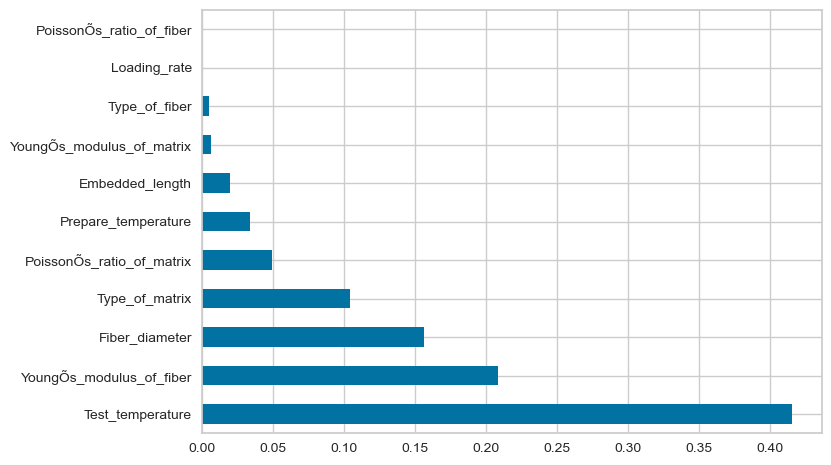

In [202]:
feat_importances = pd.Series(tuned_hyper_model.feature_importances_, index=X_train1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [203]:
# prediction

tuned_pred=tuned_hyper_model.predict(X_test1)

In [204]:
# print the total time taken
print("Total time taken: {:.2f} seconds".format(end_time - start_time))

Total time taken: 101.44 seconds


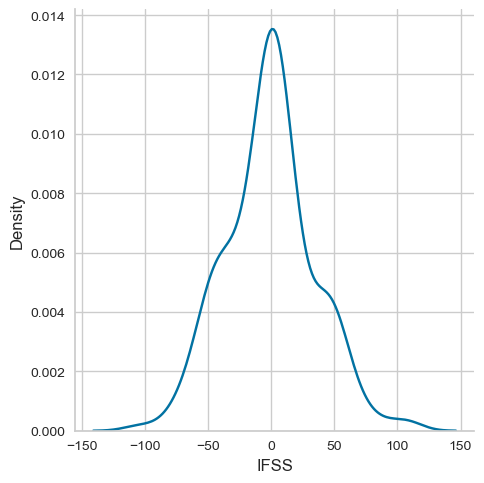

In [205]:
import seaborn as sns
sns.displot(tuned_pred-y_test2,kind='kde')

In [206]:
import sklearn.metrics as metrics
# calculate manually
d = y_test2-tuned_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)

Results by manual calculation:
MAE: 26.347331935220918
MSE: 1224.1942417464463
RMSE: 34.98848727433706


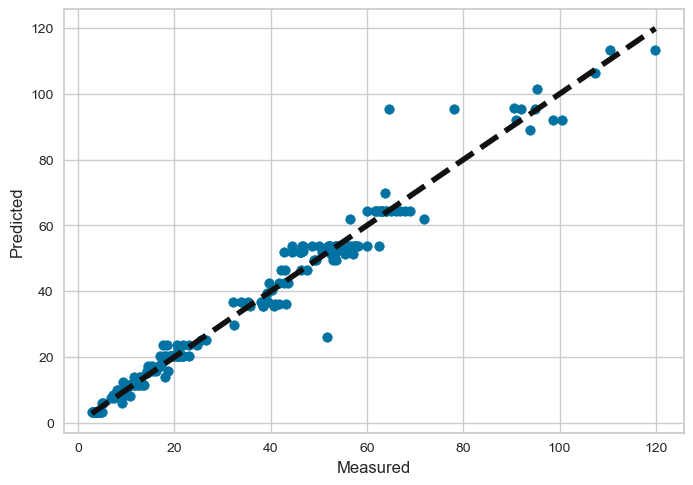

In [207]:
fig, ax = plt.subplots()
ax.scatter(y_test1,tuned_pred)
ax.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

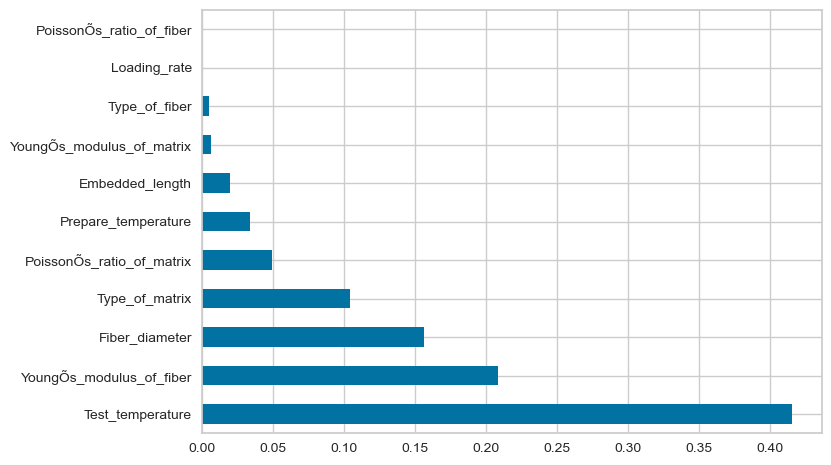

In [208]:
feat_importances = pd.Series(tuned_hyper_model.feature_importances_, index=X_train1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [209]:
feat_importances.nlargest(26)

Test_temperature             0.415502
YoungÕs_modulus_of_fiber     0.208339
Fiber_diameter               0.156648
Type_of_matrix               0.104635
PoissonÕs_ratio_of_matrix    0.049558
Prepare_temperature          0.033882
Embedded_length              0.019804
YoungÕs_modulus_of_matrix    0.006229
Type_of_fiber                0.005370
Loading_rate                 0.000033
PoissonÕs_ratio_of_fiber     0.000000
dtype: float64

In [210]:
df2=df1.drop(['YoungÕs_modulus_of_matrix','PoissonÕs_ratio_of_fiber','Loading_rate','Type_of_fiber','Fmax','IFSS','Clusters'],axis=1)

In [211]:
df2

Fiber_diameter  Embedded_length  YoungÕs_modulus_of_fiber  \
0               6.0             42.5                     294.0   
1               6.0             42.5                     294.0   
2               6.0             42.5                     294.0   
3               6.0             42.5                     294.0   
4               6.0             42.5                     294.0   
..              ...              ...                       ...   
917             7.2            158.3                      90.0   
918             7.2            188.3                      90.0   
919             7.2            218.3                      90.0   
920             7.2            248.3                      90.0   
921             7.2            278.3                      90.0   

     Type_of_matrix  PoissonÕs_ratio_of_matrix  Prepare_temperature  \
0                 1                       0.34                  370   
1                 1                       0.34                  370   
2                 1                       0.34                  370   
3                 1                       0.34                  370   
4                 1                       0.34                  370   
..              ...                        ...                  ...   
917               4                       0.36                  150   
918               4                       0.36                  150   
919               4                       0.36                  150   
920               4                       0.36                  150   
921               4                       0.36                  150   

     Test_temperature  
0                30.0  
1                30.0  
2                50.0  
3                70.0  
4                70.0  
..                ...  
917              25.0  
918              25.0  
919              25.0  
920              25.0  
921              25.0  

[918 rows x 7 columns]

In [212]:
#Splitting data into training and testing such that there will be 763 training data points as given initially
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(df2,y,test_size=0.226)

In [213]:
reg_decision_model2=DecisionTreeRegressor(max_depth=None, max_features=None,max_leaf_nodes=70,min_samples_leaf=2,min_weight_fraction_leaf=0,splitter='random')

In [214]:
reg_decision_model2.fit(X_train3,y_train3)

DecisionTreeRegressor(max_leaf_nodes=70, min_samples_leaf=2,
                      min_weight_fraction_leaf=0, splitter='random')

In [215]:
reg_decision_model2.score(X_test3,y_test3)

0.9728261058422751

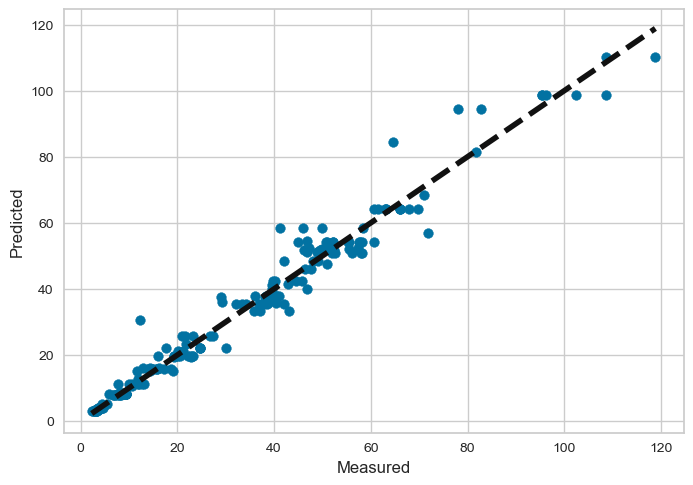

In [216]:
fig, ax = plt.subplots()
ax.scatter(y_test3,reg_decision_model2.predict(X_test3))
ax.plot([y_test3.min(), y_test3.max()], [y_test3.min(), y_test3.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

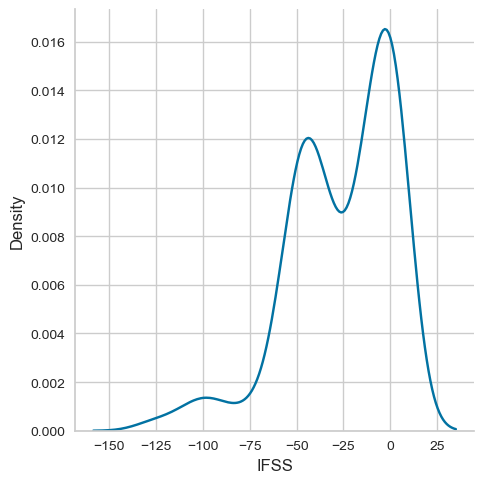

In [217]:
import seaborn as sns
ds_pred=tuned_hyper_model.predict(X_test2)
sns.displot(ds_pred-y_test2,kind='kde')

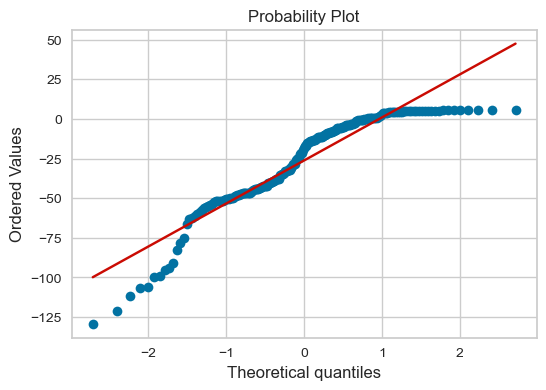

In [218]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(ds_pred-y_test2, plot=ax, fit=True)

plt.show()

# Random Forest

In [219]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [220]:
# Feature selection by ExtraTreesRegressor(model based)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [221]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [222]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rf_model.fit(X_train2, y_train2)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test2)

# Evaluate model performance
mse = mean_squared_error(y_test2, y_pred_rf)
r2 = r2_score(y_test2, y_pred_rf)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 23.54723839383809
R-squared: 0.9708425162071578


In [223]:
# Feature selection by ExtraTreesRegressor(model based)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [224]:
reg= ExtraTreesRegressor()

In [225]:
reg.fit(X_train2,y_train2)

ExtraTreesRegressor()

In [226]:
reg.score(X_test2,y_test2)

0.9572433627064019

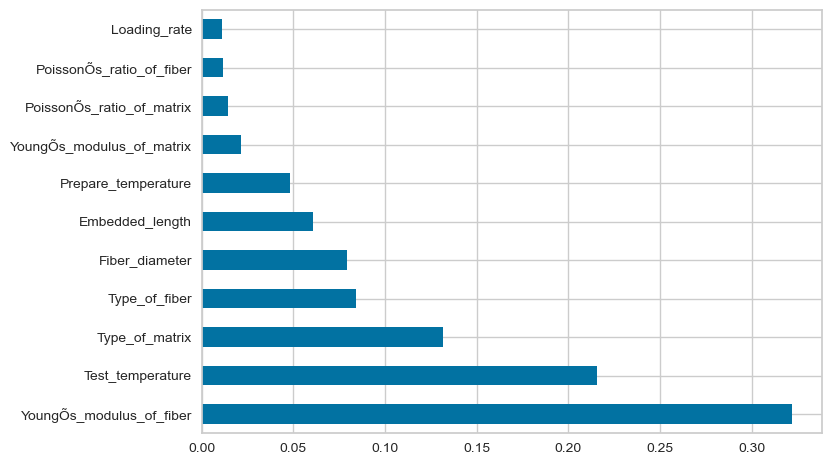

In [227]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train2.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

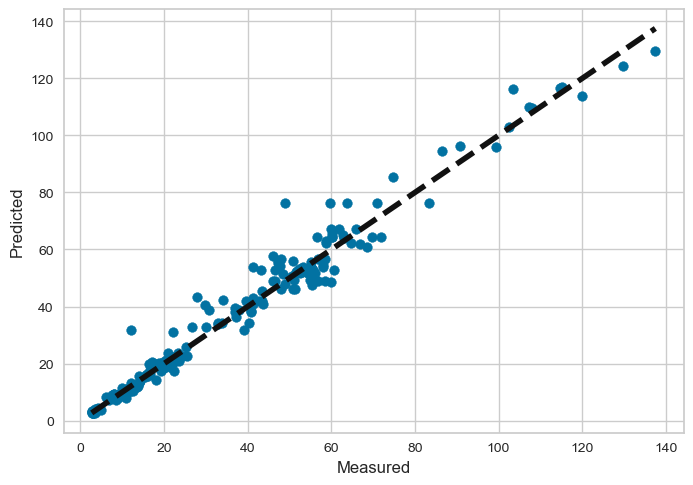

In [228]:
fig, ax = plt.subplots()
ax.scatter(y_test2,y_pred_rf)
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [229]:
#Splitting data into training and testing such that there will be 763 training data points as given initially
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.226)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_scaled,y,test_size=0.226)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_scaled,y,test_size=0.02)

In [230]:
scores_lin_reg = cross_validate(reg, df, y, cv=5,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [231]:
print(scores_lin_reg['train_r2'])
print(scores_lin_reg['test_r2'])

[1. 1. 1. 1. 1.]
[0.29112556 0.99727281 0.84047686 0.74058074 0.98518077]


In [232]:
scores_lin_reg['test_r2'].mean()

0.7709273470926911

In [233]:
reg.feature_importances_

array([0.08403574, 0.07914175, 0.06080576, 0.32211239, 0.01149136,
       0.1315759 , 0.02152261, 0.0144717 , 0.0111158 , 0.04830589,
       0.21542109])

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150,200,300],
    'max_depth': [None,1,2, 5],
    'min_samples_split': [2,3,5],
    'min_samples_leaf':[1,2,4],
    'min_weight_fraction_leaf':[0,0.2]
}

# create a random forest regressor object
rf = RandomForestRegressor(random_state=42)


# create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# start the timer
start_time = time.time()
grid_search.fit(X_train2, y_train2)
# end the timer
end_time = time.time()

# extract the best hyperparameters
best_params = grid_search.best_params_

# train a random forest regressor with the best hyperparameters
rf = RandomForestRegressor(random_state=42, **best_params)
rf.fit(X_train2, y_train2)

# make predictions on the test set
y_pred = rf.predict(X_test2)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test2, y_pred)
print("Mean squared error: {:.2f}".format(mse))


Mean squared error: 16.64


In [235]:
# print the total time taken
print("Total time taken: {:.2f} seconds".format(end_time - start_time))

Total time taken: 994.25 seconds


In [236]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 200}

In [237]:
tuned_hyper_model_rf= RandomForestRegressor(max_depth=None, max_features=None,min_samples_leaf=1,min_weight_fraction_leaf=0,min_samples_split=5,n_estimators=300)

In [238]:
tuned_hyper_model_rf.fit(X_train2,y_train2)

RandomForestRegressor(max_features=None, min_samples_split=5,
                      min_weight_fraction_leaf=0, n_estimators=300)

In [239]:
tuned_hyper_model_rf.score(X_test2,y_test2)

0.978644030524335

In [240]:
tuned_rf_pred=tuned_hyper_model_rf.predict(X_test2)

In [241]:
import sklearn.metrics as metrics
# calculate manually
d = y_test2-tuned_rf_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)

Results by manual calculation:
MAE: 2.6025025723786492
MSE: 17.05825137166822
RMSE: 4.130163601077834


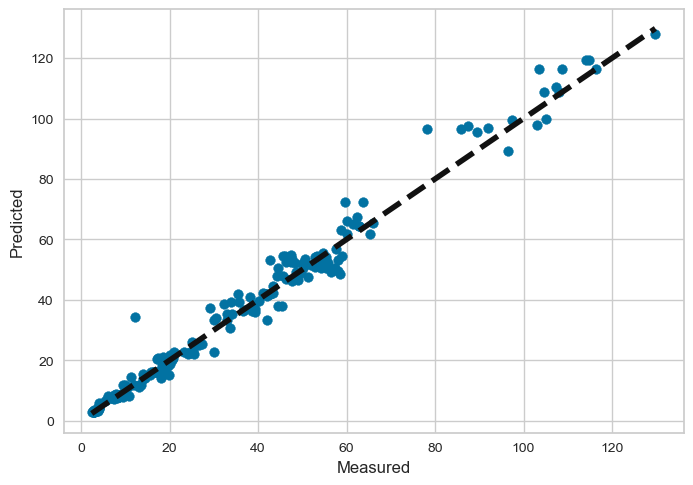

In [242]:
fig, ax = plt.subplots()
ax.scatter(y_test2,tuned_rf_pred)
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [243]:
scores_lin_reg = cross_validate(tuned_hyper_model_rf, X_train3, y_train3, cv=5,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [244]:
scores_lin_reg

{'fit_time': array([1.62981415, 1.6464684 , 1.62011576, 1.61918783, 1.65013909]),
 'score_time': array([0.07953787, 0.06253147, 0.07792068, 0.06257892, 0.07507563]),
 'test_r2': array([0.98138039, 0.97587741, 0.98007131, 0.97816027, 0.97905429]),
 'train_r2': array([0.99232175, 0.99264373, 0.9926168 , 0.99300044, 0.99234521]),
 'test_neg_mean_squared_error': array([-16.77595265, -19.07379364, -15.56469603, -16.44172836,
        -17.89993361]),
 'train_neg_mean_squared_error': array([-6.10876508, -6.04991977, -6.09770153, -5.83035773, -6.18094398])}

In [245]:
tuned_hyper_model_rf.feature_importances_

array([0.00388053, 0.6670775 , 0.02729693, 0.04220194, 0.00341324,
       0.00409986, 0.00593885, 0.0406872 , 0.01589235, 0.04927364,
       0.14023796])

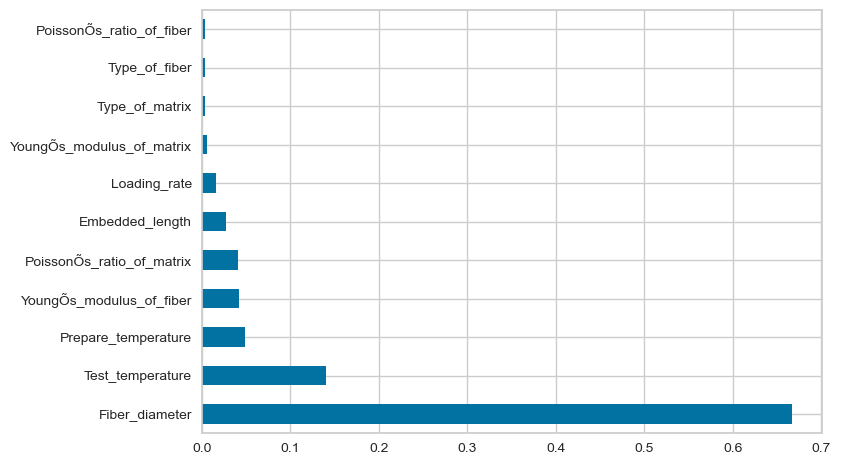

In [246]:
feat_importances = pd.Series(tuned_hyper_model_rf.feature_importances_, index=X_train2.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

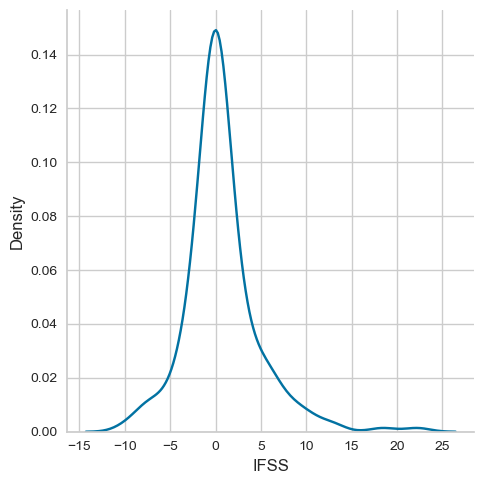

In [247]:
import seaborn as sns
rf_pred=tuned_hyper_model_rf.predict(X_test2)
sns.displot(rf_pred-y_test2,kind='kde')

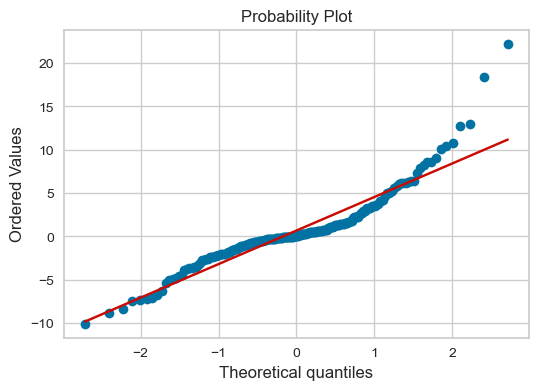

In [248]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(rf_pred-y_test2, plot=ax, fit=True)

plt.show()

In [249]:
!pip install "jax<=0.3.16" "jaxlib<=0.3.16"


  Using cached jax-0.3.16.tar.gz (1.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


ERROR: Could not find a version that satisfies the requirement jaxlib<=0.3.16 (from versions: none)
ERROR: No matching distribution found for jaxlib<=0.3.16


In [250]:
df.columns

Index(['No.', 'Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature', 'Fmax', 'IFSS', 'New_Fiber_diameter',
       'New_Embedded_length'],
      dtype='object')

In [251]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Neural Networks

In [259]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


# Build the model
model = keras.Sequential([
    keras.layers.Dense(X_train2.shape[1], activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1,activation='linear')
    #keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(X_train2, y_train2, epochs=450, validation_split=0.2)

# Evaluate the model on test data
y_pred = model.predict(X_test2)
mae = mean_absolute_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)

Epoch 1/450
18/18 [==============================] - 1s 11ms/step - loss: 1954.1100 - mae: 33.6073 - val_loss: 1901.5946 - val_mae: 33.3316
Epoch 2/450
18/18 [==============================] - 0s 4ms/step - loss: 1911.5350 - mae: 33.0766 - val_loss: 1837.1439 - val_mae: 32.5574
Epoch 3/450
18/18 [==============================] - 0s 4ms/step - loss: 1815.7632 - mae: 31.9174 - val_loss: 1686.6799 - val_mae: 30.7128
Epoch 4/450
18/18 [==============================] - 0s 4ms/step - loss: 1594.4254 - mae: 29.1276 - val_loss: 1353.7648 - val_mae: 26.3232
Epoch 5/450
18/18 [==============================] - 0s 4ms/step - loss: 1149.5029 - mae: 23.1186 - val_loss: 764.1644 - val_mae: 17.9196
Epoch 6/450
18/18 [==============================] - 0s 3ms/step - loss: 522.6877 - mae: 15.1327 - val_loss: 321.6673 - val_mae: 11.7385
Epoch 7/450
18/18 [==============================] - 0s 4ms/step - loss: 292.0732 - mae: 11.8065 - val_loss: 270.4641 - val_mae: 11.3707
Epoch 8/450
18/18 [============

Epoch 62/450
18/18 [==============================] - 0s 3ms/step - loss: 37.6067 - mae: 3.7028 - val_loss: 29.6733 - val_mae: 3.5007
Epoch 63/450
18/18 [==============================] - 0s 4ms/step - loss: 36.7405 - mae: 3.6319 - val_loss: 29.2291 - val_mae: 3.4819
Epoch 64/450
18/18 [==============================] - 0s 4ms/step - loss: 37.4790 - mae: 3.6841 - val_loss: 29.2952 - val_mae: 3.4700
Epoch 65/450
18/18 [==============================] - 0s 5ms/step - loss: 36.7620 - mae: 3.6527 - val_loss: 36.0484 - val_mae: 3.8116
Epoch 66/450
18/18 [==============================] - 0s 4ms/step - loss: 37.7200 - mae: 3.6914 - val_loss: 30.0534 - val_mae: 3.5082
Epoch 67/450
18/18 [==============================] - 0s 4ms/step - loss: 36.4305 - mae: 3.6192 - val_loss: 30.2598 - val_mae: 3.5074
Epoch 68/450
18/18 [==============================] - 0s 3ms/step - loss: 36.1031 - mae: 3.6112 - val_loss: 31.0581 - val_mae: 3.5454
Epoch 69/450
18/18 [==============================] - 0s 4ms/s

Epoch 123/450
18/18 [==============================] - 0s 4ms/step - loss: 33.9929 - mae: 3.3904 - val_loss: 31.7645 - val_mae: 3.5293
Epoch 124/450
18/18 [==============================] - 0s 4ms/step - loss: 34.1979 - mae: 3.4281 - val_loss: 26.2195 - val_mae: 3.1976
Epoch 125/450
18/18 [==============================] - 0s 4ms/step - loss: 33.9759 - mae: 3.4406 - val_loss: 34.6127 - val_mae: 3.6610
Epoch 126/450
18/18 [==============================] - 0s 4ms/step - loss: 34.8562 - mae: 3.4892 - val_loss: 26.4912 - val_mae: 3.2087
Epoch 127/450
18/18 [==============================] - 0s 4ms/step - loss: 34.3377 - mae: 3.3981 - val_loss: 27.7339 - val_mae: 3.2853
Epoch 128/450
18/18 [==============================] - 0s 3ms/step - loss: 35.8464 - mae: 3.4660 - val_loss: 33.8677 - val_mae: 3.6219
Epoch 129/450
18/18 [==============================] - 0s 4ms/step - loss: 34.4112 - mae: 3.4275 - val_loss: 30.6259 - val_mae: 3.4261
Epoch 130/450
18/18 [==============================] - 

Epoch 184/450
18/18 [==============================] - 0s 4ms/step - loss: 34.1514 - mae: 3.3717 - val_loss: 33.1719 - val_mae: 3.5845
Epoch 185/450
18/18 [==============================] - 0s 4ms/step - loss: 33.4061 - mae: 3.3284 - val_loss: 27.8228 - val_mae: 3.2879
Epoch 186/450
18/18 [==============================] - 0s 4ms/step - loss: 32.7649 - mae: 3.2889 - val_loss: 27.0962 - val_mae: 3.2343
Epoch 187/450
18/18 [==============================] - 0s 4ms/step - loss: 33.0360 - mae: 3.2866 - val_loss: 25.8720 - val_mae: 3.1543
Epoch 188/450
18/18 [==============================] - 0s 4ms/step - loss: 33.7869 - mae: 3.3952 - val_loss: 32.5378 - val_mae: 3.5869
Epoch 189/450
18/18 [==============================] - 0s 4ms/step - loss: 33.0944 - mae: 3.3023 - val_loss: 25.4233 - val_mae: 3.1351
Epoch 190/450
18/18 [==============================] - 0s 4ms/step - loss: 34.7645 - mae: 3.3978 - val_loss: 40.1709 - val_mae: 3.9729
Epoch 191/450
18/18 [==============================] - 

Epoch 245/450
18/18 [==============================] - 0s 3ms/step - loss: 32.5002 - mae: 3.2577 - val_loss: 24.8758 - val_mae: 3.1007
Epoch 246/450
18/18 [==============================] - 0s 4ms/step - loss: 32.9049 - mae: 3.2947 - val_loss: 24.1863 - val_mae: 3.0689
Epoch 247/450
18/18 [==============================] - 0s 4ms/step - loss: 32.3225 - mae: 3.2481 - val_loss: 26.1650 - val_mae: 3.1859
Epoch 248/450
18/18 [==============================] - 0s 3ms/step - loss: 32.2282 - mae: 3.2427 - val_loss: 24.3224 - val_mae: 3.0693
Epoch 249/450
18/18 [==============================] - 0s 3ms/step - loss: 32.5321 - mae: 3.2514 - val_loss: 26.7736 - val_mae: 3.2173
Epoch 250/450
18/18 [==============================] - 0s 3ms/step - loss: 32.1451 - mae: 3.2157 - val_loss: 25.0231 - val_mae: 3.0833
Epoch 251/450
18/18 [==============================] - 0s 5ms/step - loss: 32.1811 - mae: 3.2436 - val_loss: 26.5931 - val_mae: 3.2107
Epoch 252/450
18/18 [==============================] - 

Epoch 306/450
18/18 [==============================] - 0s 4ms/step - loss: 32.2030 - mae: 3.2158 - val_loss: 28.2238 - val_mae: 3.2819
Epoch 307/450
18/18 [==============================] - 0s 4ms/step - loss: 31.7274 - mae: 3.1814 - val_loss: 25.9550 - val_mae: 3.1540
Epoch 308/450
18/18 [==============================] - 0s 4ms/step - loss: 31.8051 - mae: 3.1976 - val_loss: 27.0714 - val_mae: 3.2116
Epoch 309/450
18/18 [==============================] - 0s 5ms/step - loss: 31.5626 - mae: 3.1949 - val_loss: 22.6228 - val_mae: 2.9340
Epoch 310/450
18/18 [==============================] - 0s 4ms/step - loss: 32.6452 - mae: 3.2924 - val_loss: 36.5950 - val_mae: 3.8445
Epoch 311/450
18/18 [==============================] - 0s 4ms/step - loss: 33.5296 - mae: 3.3469 - val_loss: 24.8417 - val_mae: 3.0754
Epoch 312/450
18/18 [==============================] - 0s 4ms/step - loss: 32.2556 - mae: 3.2030 - val_loss: 31.1592 - val_mae: 3.4271
Epoch 313/450
18/18 [==============================] - 

Epoch 367/450
18/18 [==============================] - 0s 4ms/step - loss: 32.1119 - mae: 3.2002 - val_loss: 25.7269 - val_mae: 3.0897
Epoch 368/450
18/18 [==============================] - 0s 3ms/step - loss: 31.4595 - mae: 3.1508 - val_loss: 23.5908 - val_mae: 2.9851
Epoch 369/450
18/18 [==============================] - 0s 3ms/step - loss: 32.0933 - mae: 3.1577 - val_loss: 23.4366 - val_mae: 2.9518
Epoch 370/450
18/18 [==============================] - 0s 6ms/step - loss: 32.2710 - mae: 3.1470 - val_loss: 22.5165 - val_mae: 2.8965
Epoch 371/450
18/18 [==============================] - 0s 5ms/step - loss: 31.0132 - mae: 3.1467 - val_loss: 26.6845 - val_mae: 3.1685
Epoch 372/450
18/18 [==============================] - 0s 3ms/step - loss: 32.1907 - mae: 3.1366 - val_loss: 24.2147 - val_mae: 3.0057
Epoch 373/450
18/18 [==============================] - 0s 4ms/step - loss: 31.1918 - mae: 3.1327 - val_loss: 23.2867 - val_mae: 2.9475
Epoch 374/450
18/18 [==============================] - 

Epoch 428/450
18/18 [==============================] - 0s 3ms/step - loss: 31.7652 - mae: 3.1633 - val_loss: 25.4473 - val_mae: 3.0627
Epoch 429/450
18/18 [==============================] - 0s 4ms/step - loss: 30.3048 - mae: 3.0858 - val_loss: 22.4295 - val_mae: 2.8777
Epoch 430/450
18/18 [==============================] - 0s 4ms/step - loss: 32.5407 - mae: 3.2060 - val_loss: 25.7655 - val_mae: 3.0714
Epoch 431/450
18/18 [==============================] - 0s 3ms/step - loss: 31.1376 - mae: 3.1285 - val_loss: 25.8127 - val_mae: 3.0898
Epoch 432/450
18/18 [==============================] - 0s 3ms/step - loss: 31.6992 - mae: 3.1904 - val_loss: 21.9400 - val_mae: 2.8748
Epoch 433/450
18/18 [==============================] - 0s 5ms/step - loss: 31.9806 - mae: 3.1430 - val_loss: 23.3785 - val_mae: 2.9447
Epoch 434/450
18/18 [==============================] - 0s 4ms/step - loss: 31.5809 - mae: 3.1435 - val_loss: 29.0073 - val_mae: 3.2784
Epoch 435/450
18/18 [==============================] - 

In [253]:
nn_pred=model.predict(X_test2)

7/7 [==============================] - 0s 3ms/step


7/7 [==============================] - 0s 2ms/step


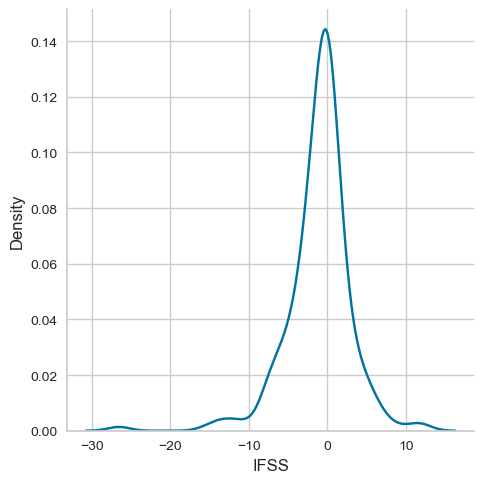

In [273]:
import seaborn as sns
nn_pred=model.predict(X_test2)
sns.displot(nn_pred.flatten()-y_test2,kind='kde')

In [274]:
# print the total time taken
print("Total time taken: {:.2f} seconds".format(end_time - start_time))

Total time taken: 994.25 seconds


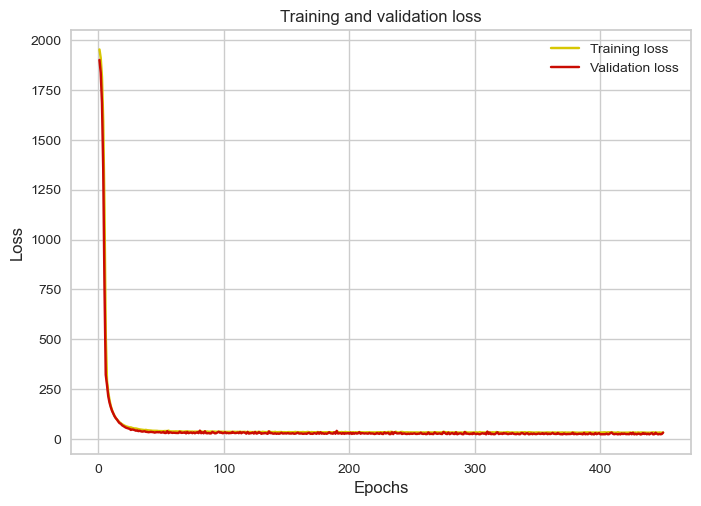

In [275]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

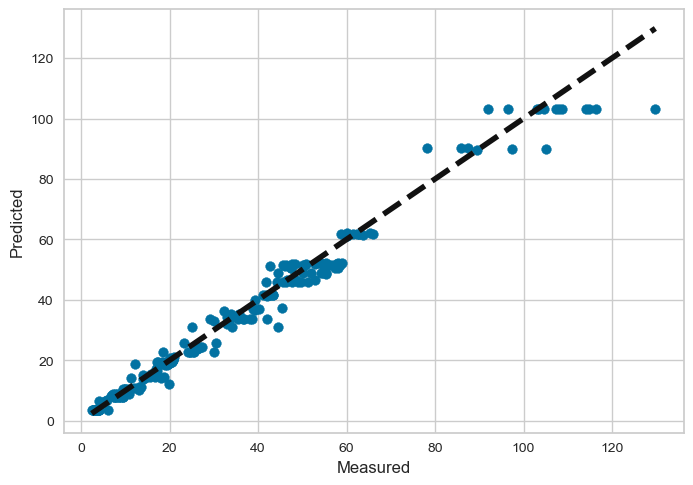

In [276]:
fig, ax = plt.subplots()
ax.scatter(y_test2,nn_pred)
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# SVR

In [277]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

# start_time = time.time()
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [10,100,300,500], 'gamma': [0.1,0.5,0.8,0.01], 'kernel': ['poly','rbf', 'linear']}

# Define the SVM model
svm_model = SVR()

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train2, y_train2)

# end_time = time.time()
# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict on the test set with the best parameters
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test2)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
print("MSE: ", mse)
print("R2 score: ", r2)

Best parameters:  {'C': 10, 'gamma': 0.8, 'kernel': 'poly'}
Best score:  0.9762019890035087
MSE:  17.716444887847498
R2 score:  0.9778200093316382


In [278]:
df.columns

Index(['No.', 'Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature', 'Fmax', 'IFSS', 'New_Fiber_diameter',
       'New_Embedded_length'],
      dtype='object')

Text(0.5, 0, 'Permutation Importance')

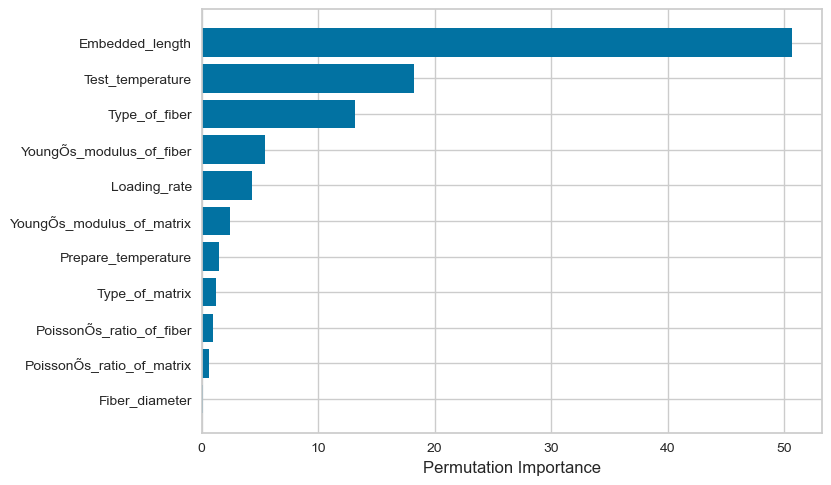

In [279]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc =  SVR(kernel='poly', C=10,gamma=0.8)
svc.fit(X_train2, y_train2)

perm_importance = permutation_importance(svc, X_test2, y_test2)

feature_names = ['Type_of_fiber', 'Fiber_diameter', 'Embedded_length',
       'YoungÕs_modulus_of_fiber', 'PoissonÕs_ratio_of_fiber',
       'Type_of_matrix', 'YoungÕs_modulus_of_matrix',
       'PoissonÕs_ratio_of_matrix', 'Loading_rate', 'Prepare_temperature',
       'Test_temperature' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [280]:
# print the total time taken
print("Total time taken: {:.2f} seconds".format(end_time - start_time))

Total time taken: 994.25 seconds


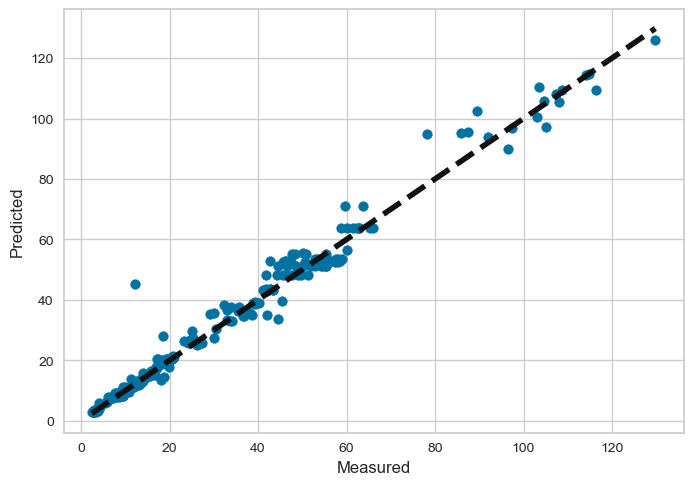

In [281]:
fig, ax = plt.subplots()
ax.scatter(y_test2, best_svm_model.predict(X_test2))
ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

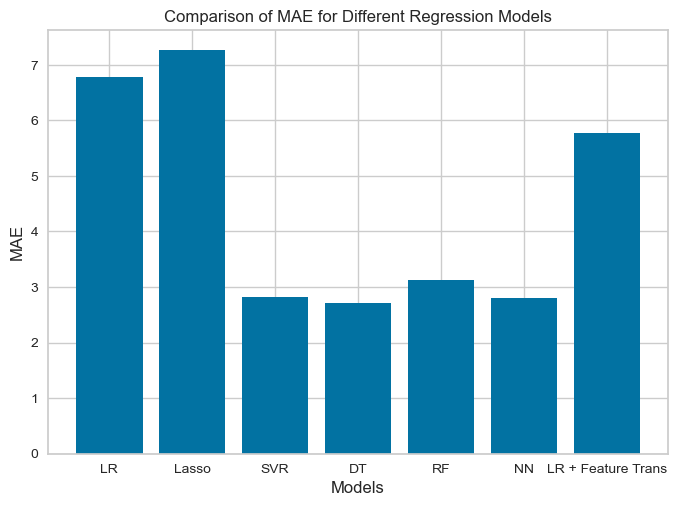

In [282]:
# Bar plot
models = ['LR', 'Lasso', 'SVR','DT','RF','NN','LR + Feature Trans']
mae_values = [6.78, 7.26, 2.83,2.72,3.13,2.81,5.78]

plt.bar(range(len(models)), mae_values, tick_label=models)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Different Regression Models')
plt.show()

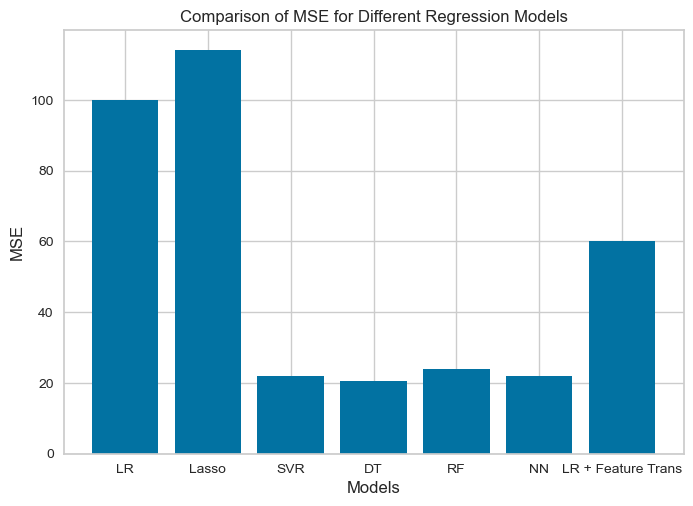

In [283]:
# Bar plot
models = ['LR', 'Lasso', 'SVR','DT','RF','NN','LR + Feature Trans']
mae_values = [100, 114, 22 ,20.5 ,24,22,60]

plt.bar(range(len(models)), mae_values, tick_label=models)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE for Different Regression Models')
plt.show()

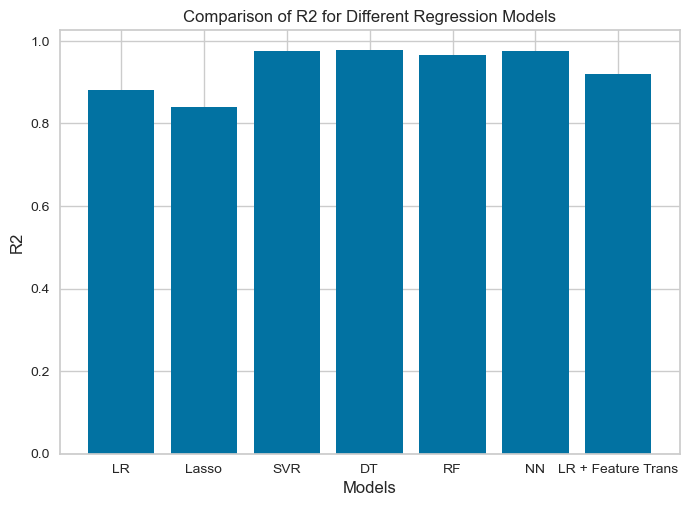

In [284]:
# Bar plot
models = ['LR', 'Lasso', 'SVR','DT','RF','NN','LR + Feature Trans']
mae_values = [0.88, 0.84, 0.976 ,0.977 ,0.965,0.975,0.92]

plt.bar(range(len(models)), mae_values, tick_label=models)
plt.xlabel('Models')
plt.ylabel('R2')
plt.title('Comparison of R2 for Different Regression Models')
plt.show()

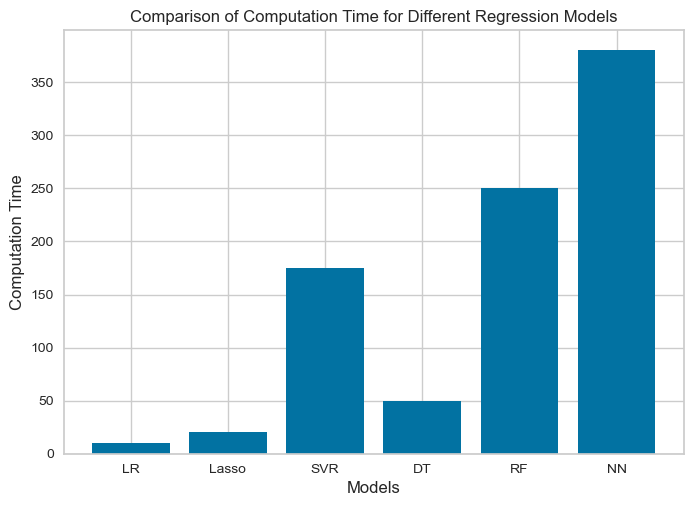

In [285]:
# Bar plot
models = ['LR', 'Lasso', 'SVR','DT','RF','NN']
mae_values = [10, 20,175 ,50,250,380]

plt.bar(range(len(models)), mae_values, tick_label=models)
plt.xlabel('Models')
plt.ylabel('Computation Time')
plt.title('Comparison of Computation Time for Different Regression Models')
plt.show()

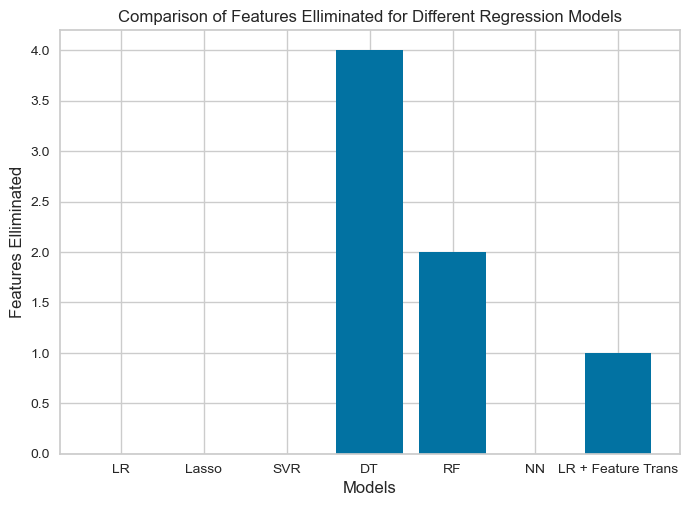

In [286]:
# Bar plot
models = ['LR', 'Lasso', 'SVR','DT','RF','NN','LR + Feature Trans']
mae_values = [0, 0,0,4,2,0,1]

plt.bar(range(len(models)), mae_values, tick_label=models)
plt.xlabel('Models')
plt.ylabel('Features Elliminated')
plt.title('Comparison of Features Elliminated for Different Regression Models')
plt.show()